# **Loan Default Prediction**

## Table of Contents
- [Problem and Solution Summary](#Problem-and-Solution-Summary)
- [Executive Summary](#Executive-Summary)
- [Recommendations for Implementation](#Recommendations-for-Implementation)
- [Problem Definition](#Problem-Definition)
- [Data Description](#Data-Description)
- [Data Overview](#Data-Overview)
- [Exploratory Analysis and Visualization](#Exploratory-Data-Analysis-and-Visualization)
    - [Univariate Analysis](#Univariate-Analysis)
    - [Bivariate Analysis](#Bivariate-Analysis)
    - [Multivariate Analysis](#Multivariate-Analysis)
- [Treating Outliers](#Treating-Outliers)
- [Treating Missing Data](#Treating-Missing-Data)
- [Model Building](#Model-Building)
    - [Data Preparation](#Data-Perparation)
    - [Logistic Regression](#Logistic-Regression)
        - [Logistic Regression Tuning](#Logistic-Regression-Hyperparameter-Tuning)
    - [Decision Tree Classifier](#Decision-Tree-Classifier)
        - [Decision Tree Tuning](#Decision-Tree-Hyperparameter-Tuning)
    - [Random Forest Classifier](#Random-Forest-Classifier)
        - [Random Forest Tuning](#Random-Forest-Hyperparameter-Tuning)
    - [Support Vector Machine Classifier](#Support-Vector-Machine-Classifier)
        - [SVM Tuning](#SVM-Hyperparameter-Tuning)
    - [eXtreme Gradient Boost Classifier](#eXtreme-Gradient-Boost-Classifier)
        - [XGBoost Hyperparameter Tuning](#XGBoost-Hyperparameter-Tuning)
    - [Light Gradient Boost Model](#Light-Gradient-Boost-Model)
        - [LGBM Hyperparameter Tuning](#LGBM-Hyperparameter-Tuning)
- [Model Comparison](#Model-Comparison)

## Problem and Solution Summary
**Problem:** Loans are high risk, high reward. When they are repaid, loans are a major soure of profit for banks. Loans that go into default can be very costly. Deciding who should be approved for a loan is complex and prone to bias when dones by a person.
<br><br>
**Solution:** Machine learning offers and opportuity to reduce the amount of work required to approve loans, remove human bias and reduce risk (loans defaulting). The appropriate algorithm needs to accurately predict who will default on a loan. The algorithm also needs to not be so conservative as to reject a large proportion of potential borrowers. Lastly, the model needs to be interpretable, such that reasoning can be given as to why a loan was denied.

## Executive Summary
- 6 different types of models were applied to the data, tuned, and compared
- Models were compared across a few metrics (accuracy, precision, recall), however recall is the metric that is most important
- Debt to income ratio is by far the biggest predictor of loan default, although this is also the variable with the greatest amount of missing data
- Number of delinquent credit lines, age of oldest credit line and number of credit lines also have some importance
- Type of job and reason for loan are of little importance
- All tree-based models performed well, with XGBoost performing the best on accuracy and recall
- XGBoost performed best overall, primarily due good recall (82%), which is the most important metric here - correctly identifying the most loan defaults
- Missing data and outliers may be detracting from model. It might perform better with high quality data

## Recommendations for Implementation
- It is recommended to try modeling the data again, without using dummy variables. XGBoost has the ability to handle categorical data, however this capability is still experimental
- It is also worth exploring how loan term and interest rate may contribute to loan default
- Usually it is a good idea to update models periodically, however in the case of loans this is hard to do. For loan applicants that are denied, there is no way to know if that loan would have been paid back or not. That data would be without labels. In the case of loans that do go into default, this is data that can take many years to collect, leading to a very slow feedback loop (or none). Nevertheless, loan denial rate and loan default rate should still be tracked over time
- Initially, decisions on whether or not to approve a loan should be made by both the existing method and the model to check how often they disagree
- Focus needs to be on gathering the right data. Input systems should not allow for missing data. They should also be checking data to make sure it is within set limits (ie. age of credit line should not be >100)
- The model should be checked with real data, which has profit/loss included, to better understand the relative risks of incorrectly approving or denying loans
- There should also be some oversight to ensure data is being accurately entered. While the model should limit bias, this requires accurate data
- Biggest risk would be drift - wherein the relationship between different variables and loan default could change over time. This is likely something that would take years to be apparent, due to the nature of lending
- Main benefit of implementing the model would be better identification of which loan applicants repay loans and which will default, resulting in larger profits for the bank

## **Problem Definition**

### **The Context:**

 - Loans, when payments are made, are a major source of profits for banks. Loans which are defaulted on are very costly for banks, eating into profits. This makes loans a high risk for the business.
 - Historically, loan approval was a more manual process, making decisions based off of credit score, credit history, amount of loan relative to assets, age, income, type of job.
 - Understanding what factors are associated with loans being paid off or defaulted can help banks make better informed decisions on when to approve loans. Having a computer do this will be faster than a person and could yield a more accurate model as it can handle a large amount of data.
 - If a model can help avoid approving loans that will eventually go into default, this makes the bank more profitable. However, it also needs to be not overly restrictive such that few loans would get approved, as that would limit revenue.

### **The objective:**

 - To build a model that will accurately predict if a loan will be paid off or go into default, using a set of variables obtained when applying for a loan that are presumed to be meaningful. The model needs to be simple enough that the bank would be able to provide the basis for which a loan is denied.

### **Missing information:**

- How much money does the bank make from a loan that is fully repaid? And how much do they typically lose on a defaulted loan? Would help to know the risk v reward balance.
- What is the term (30 years? 10 years?) and at what point did they go into default?

### **The key questions:**

- Which variables are most important, and thus most predictive of loan default or repayment?
- How well can this model be expected to perform, especially in regards to existing methods?
- What balance of Type I and Type II errors would be best? (Hard to know without knowing profit or loss from loans)

### **The problem formulation**:

- Loans which go into default cost banks money, rather than earning money through interest on principal. Being able to increase the precision for deciding when to approve a loan makes the loans lower risk and is more profitable.
- Goal is to come up with a model that makes more precise loan approval decisions. An ideal model needs to balance the risk of false negatives (loans approved that default) against lost business from false positives (loans denied to credit-worthy customers).

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [1]:
# data handling & viz
import numpy as np  # for treating outliers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# data prep
from sklearn.model_selection import train_test_split

# scaling data before modeling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# regression classifier
from sklearn.linear_model import LogisticRegression 
# to create classification trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# visualize trees
from sklearn import tree
# tune parameters
from sklearn.model_selection import GridSearchCV
# SVM models
from sklearn.svm import SVC
# gradient boosting tree classifier
from xgboost.sklearn import XGBClassifier
# light gradient boost model
import lightgbm as lgb

# metrics to assess model performance
from sklearn.metrics import (
    f1_score,  # balance of recall & precision (harmonic mean)
    accuracy_score,  #  % correct (all predictions)
    recall_score,  # ability to find relevant cases in dataset
    precision_score,  # ability to find only relevant data
    confusion_matrix,
    classification_report,
    make_scorer,  # for scoring models when running grid search
    precision_recall_curve
)

# to save models
from joblib import dump, load

## **Data Overview**

In [2]:
# read in data and view first 2 rows to verify
df = pd.read_csv("C:/Users/jeske/Documents/MIT Applied Data Sci/MIT ADSP Capstone Projects/Practical DS and Classification/hmeq.csv")
df.head(2)

BAD  LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0  39025.0  HomeImp  Other  10.5    0.0     0.0   
1    1  1300  70053.0  68400.0  HomeImp  Other   7.0    0.0     2.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN

In [3]:
# check how much data there is
df.shape

(5960, 13)

In [4]:
# check out columns, data types, presence of missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observations:**
- Almost all columns have some missing data. Debt-to-income ratio has the most missing values, more than 20% missing
- BAD and LOAN have no missing data
- Most data is numeric; only 2 columns of categorical data that will need encoding
- Target (BAD) is currently an integer; may want to cast to category before modeling

In [5]:
# Get % of missing data
df.isna().sum().sort_values(ascending = False)/len(df)

DEBTINC    0.212584
DEROG      0.118792
DELINQ     0.097315
MORTDUE    0.086913
YOJ        0.086409
NINQ       0.085570
CLAGE      0.051678
JOB        0.046812
REASON     0.042282
CLNO       0.037248
VALUE      0.018792
BAD        0.000000
LOAN       0.000000
dtype: float64

In [6]:
# check for duplicates
df.duplicated().sum()

0

**Observation:** No duplicates

## Summary Statistics

In [7]:
# basic stats for numeric columns
df.describe().T

count           mean           std          min           25%  \
BAD      5960.0       0.199497      0.399656     0.000000      0.000000   
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
BAD          0.000000       0.000000       1.000000  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Observations:**<br>
- About 20% of loans in this data set were defaulted on.
- Large range in loan amount, with the data skewed right
- Same for the mortgage amount remaining (obviously this data doesn't represent higher COL areas like California or NYC)
- Home value is skewed in the same way that loan amount and mortgage area.
- Years at current job averages ~9 years.
- Number of derogatory comments on credit ranges from 0 to a max of 10
- Max amount of delinquent credit lines is 15
- Average age of older line of credit is roughly 15 years (180 months)
- Max age of credit line is 1168 months - roughly 97 years. Either a typo or a loan was made to someone >110 years old.
- Majority of loan applicants had <=2 recent credit inquiries, with the highest being 17
- Number of credit lines ranges from 0 to 71 (I'm assuming those with 0 credit lines have missing data for mortgage)
- Debt-to-income ratio ranges from 0.53 to 203.3, with a median or 34.8

In [8]:
# Taking a look at the 2 categorical variables
df.describe(include=(['object'])).T

count unique      top  freq
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

In [9]:
# look at distribution of data within each categorical variable
cat_col = ['BAD', 'REASON', 'JOB']

for column in cat_col:
    print(df[column].value_counts(1))
    print("-" * 50)

BAD
0    0.800503
1    0.199497
Name: proportion, dtype: float64
--------------------------------------------------
REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
--------------------------------------------------
JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
--------------------------------------------------


**Observations:**<br>
More than 2/3 of loans are for debt consolidation. The rest, about 31%, are for home improvement.

## Exploratory Data Analysis and Visualization

### **Univariate Analysis**
<br>
Looking at distribution of values across the dataset for individual variables - shape of the distribution, outliers

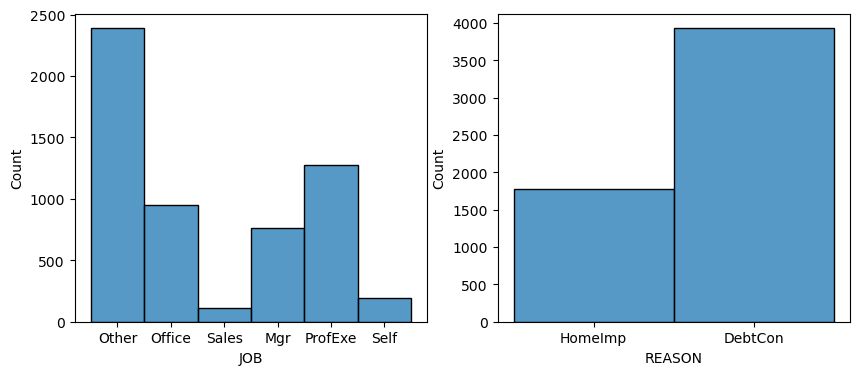

In [10]:
# distribution plots of categorical variables (excl target var)
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
sns.histplot(df, x='JOB', ax=axs[0])
sns.histplot(df, x='REASON', ax=axs[1])
plt.show()

In [11]:
def histogram_boxplot(data, feature, figsize=(10, 6), kde=False):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,6))
    kde: whether to the show density curve (default False)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.2, 0.8)},
        figsize = figsize,
    ) # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "skyblue") 
    # Boxplot will be created and a star will indicate the mean value of the column
    
    sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2) # For histogram
    ax_hist2.axvline(data[feature].mean(), color = "green", linestyle = "--") # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color = "black", linestyle = "-") # Add median to the histogram

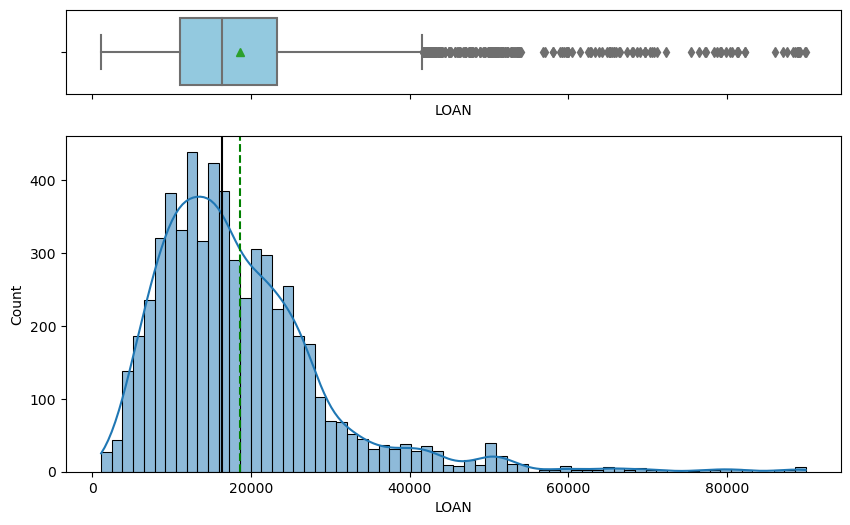

In [12]:
# begin plotting all of the numeric variable distributions
histogram_boxplot(df, 'LOAN', kde=True)

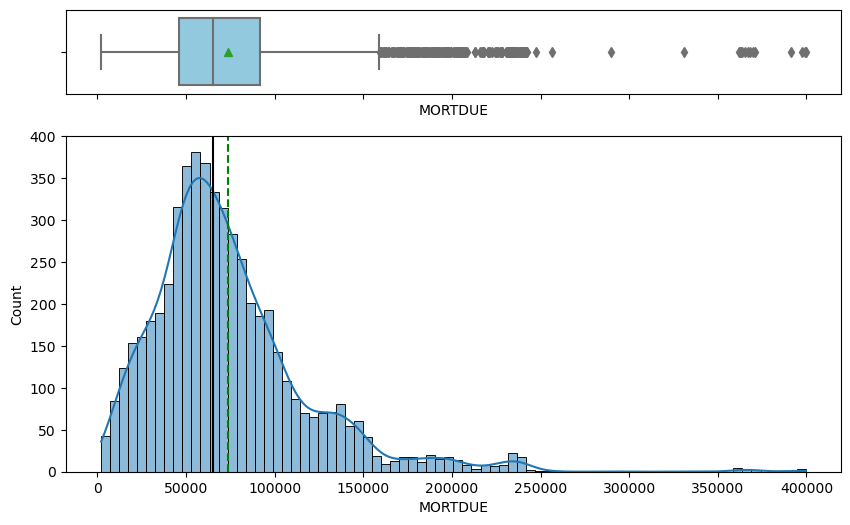

In [13]:
histogram_boxplot(df, 'MORTDUE', kde=True)

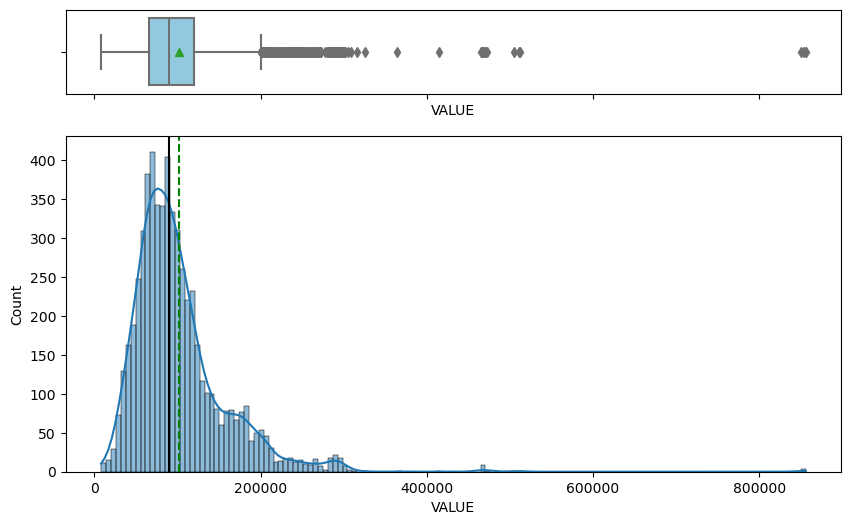

In [14]:
histogram_boxplot(df, 'VALUE', kde=True)

**Observations:** 
- Value of property has a number of outliers, notably a couple of points >800,000, whereas the median and mean are at or below 100,000.
- Although it might seem out of place, it may still be accurate data - plotting values for all homes in an area might yield a similar looking curve

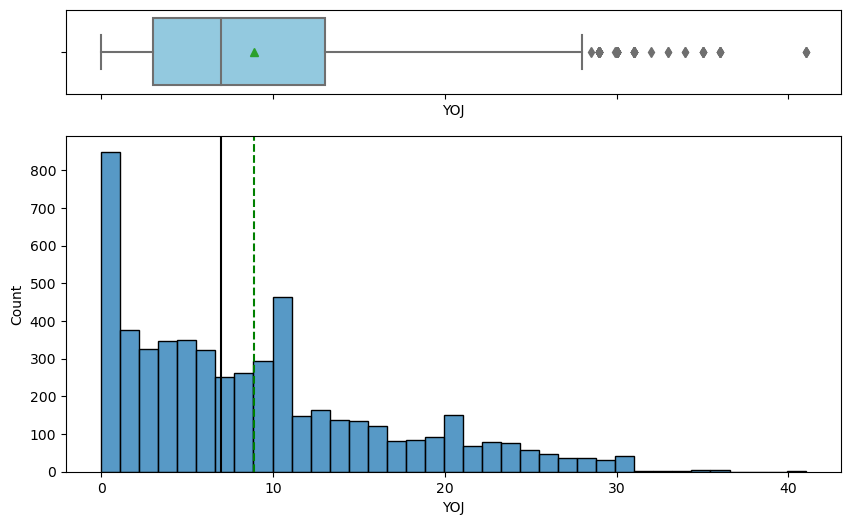

In [15]:
histogram_boxplot(df, 'YOJ')

**Observations:**
- Distribution of years on job across the dataset looks a bit like a power law chart
- Half of loans were to people with <= 7 years
- This distribution is expected. More and more, people are not staying at the same job for decades, plus people are less likely to be needing loans after working 20, 30 or more years

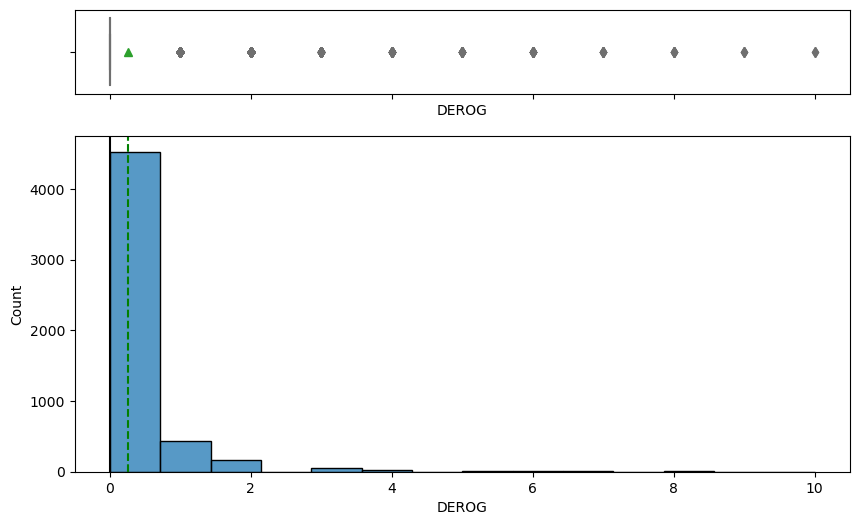

In [16]:
histogram_boxplot(df, 'DEROG')

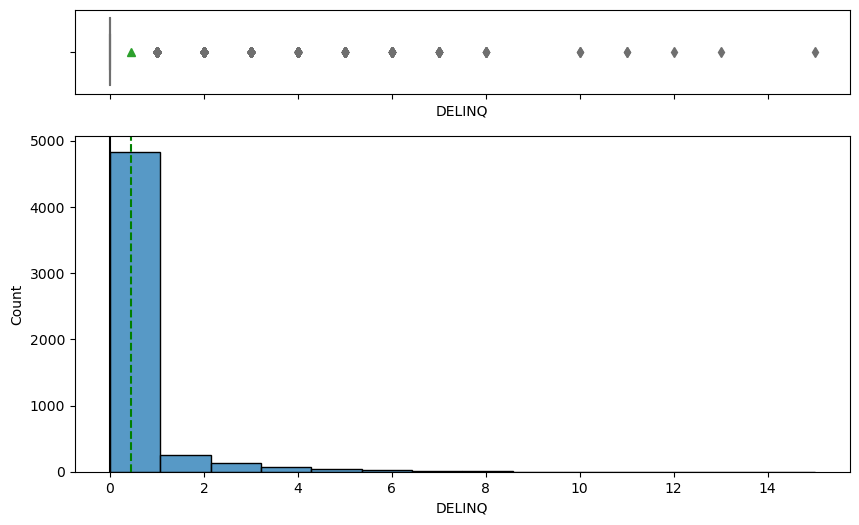

In [17]:
histogram_boxplot(df, 'DELINQ')

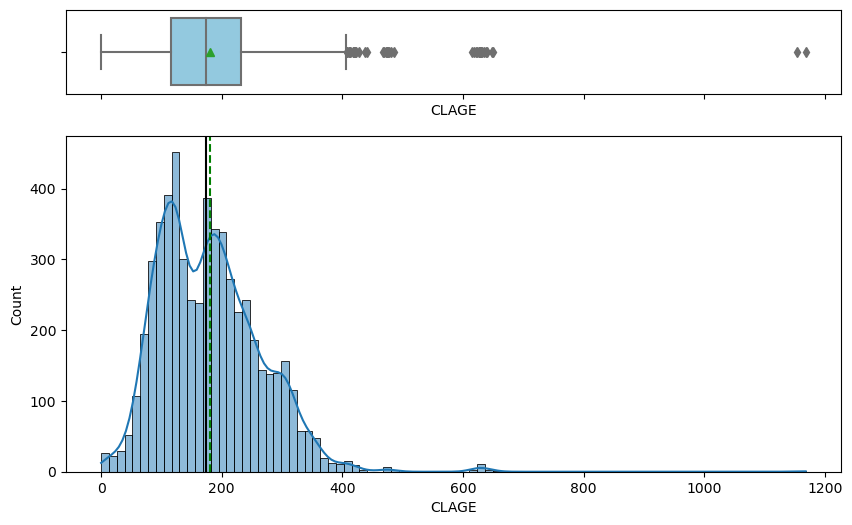

In [18]:
histogram_boxplot(df, 'CLAGE', kde=True)

**Observations:**
- Curious bimodal distribution for age of oldest credit line. If it represents 2 populations, what is it that defines them?
- There are a few outliers around 600-650, which are believeable
- There are a couple outliers at ~1200 months (100 years). Although times may have changed, most forms of credit require you to be 18. That makes these people ~115 years old. This begs the question, should these be treated like other outliers or dropped from the dataset?

In [19]:
df[df.CLAGE > 1100]

BAD   LOAN  MORTDUE     VALUE   REASON    JOB  YOJ  DEROG  DELINQ  \
3097    1  16800  87300.0  155500.0  DebtCon  Other  3.0    0.0     0.0   
3679    1  19300  96454.0  157809.0  DebtCon  Other  3.0    0.0     0.0   

            CLAGE  NINQ  CLNO    DEBTINC  
3097  1154.633333   0.0   0.0        NaN  
3679  1168.233561   0.0   0.0  40.206138

**Observations:**
- These 2 loans are to people with above average property value and mortgage due, with a loan amount around or a bit above the average
- They both, suspiciously have zero credit lines. If they have a mortgage, then they should have at least one credit line.
- There are 60 others with no credit lines, which are missing credit line age which makes sense. However, some of these also have a mortgage (is that excluded from # credit lines?)
- A number of these people are missing 3-4 data points - as if they have no mortgage or job or credit lines<br>
**It might be worth looking at models if 0 is used to fill in missing CLAGE for these people.**

In [20]:
# force display of all rows
pd.set_option('display.max_rows', None)

df[df.CLNO==0]

BAD   LOAN   MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  \
21      1   2400   50000.0   73395.0  HomeImp  ProfExe   5.0    1.0     0.0   
92      0   4000       NaN   45760.0  HomeImp      NaN   0.0    0.0     0.0   
118     0   4500       NaN   49044.0  HomeImp      NaN   0.0    0.0     0.0   
220     0   5300       NaN   49396.0  HomeImp      NaN   0.0    0.0     0.0   
298     0   5900       NaN   51189.0  HomeImp      NaN   1.0    0.0     0.0   
329     0   6000       NaN   53190.0  HomeImp      NaN   0.0    0.0     0.0   
341     0   6100       NaN   46830.0  HomeImp      NaN   0.0    0.0     1.0   
418     0   6600       NaN   48800.0  HomeImp      NaN   0.0    0.0     0.0   
422     0   6600       NaN   46516.0  HomeImp      NaN   0.0    0.0     0.0   
552     0   7400       NaN   54138.0  HomeImp      NaN   1.0    0.0     0.0   
578     1   7500       NaN   40150.0  HomeImp    Other   5.0    0.0     0.0   
659     1   8000   33000.0   38500.0  HomeImp    Other   2.0    0.0     0.0   
723     1   8200   47700.0   60000.0  DebtCon    Other   0.1    0.0     0.0   
1493    1  11100       NaN   26400.0  HomeImp    Other   8.0    0.0     0.0   
1724    0  12000       NaN   63000.0      NaN      NaN   0.0    0.0     0.0   
1780    0  12100       NaN   72731.0      NaN      NaN   0.0    0.0     0.0   
1855    0  12400       NaN   69350.0      NaN      NaN   0.0    0.0     0.0   
1856    1  12400   94000.0  112000.0  DebtCon      Mgr   4.0    0.0     0.0   
2078    0  13100       NaN   65933.0      NaN      NaN   0.0    0.0     0.0   
2113    0  13300       NaN   72583.0      NaN      NaN   1.0    0.0     0.0   
2192    0  13600       NaN   71904.0      NaN      NaN   0.0    0.0     0.0   
2203    1  13600   70000.0   88000.0  DebtCon      Mgr  16.0    0.0     0.0   
2289    1  13900  103030.0  114131.0  DebtCon      Mgr   3.0    0.0     0.0   
2365    0  14300       NaN   63319.0      NaN      NaN   0.0    0.0     0.0   
2387    0  14400       NaN   69712.0      NaN      NaN   0.0    0.0     0.0   
2617    0  15000       NaN   68020.0      NaN      NaN   1.0    0.0     0.0   
2633    0  15100       NaN   65961.0      NaN      NaN   0.0    0.0     0.0   
2635    1  15100       NaN       NaN      NaN      NaN   0.0    0.0     0.0   
2659    0  15200       NaN   67103.0      NaN      NaN   1.0    0.0     0.0   
2801    1  15700   83761.0  125860.0  HomeImp    Other   1.0    0.0     0.0   
2828    1  15800   74815.0   89721.0  DebtCon      Mgr  16.0    0.0     0.0   
3097    1  16800   87300.0  155500.0  DebtCon    Other   3.0    0.0     0.0   
3211    1  17200   50742.0   71000.0  DebtCon    Other  15.0    0.0     0.0   
3679    1  19300   96454.0  157809.0  DebtCon    Other   3.0    0.0     0.0   
3690    1  19400   86219.0  126904.0  HomeImp    Other   0.0    0.0     0.0   
3941    1  20600   48500.0   72000.0  DebtCon    Other  17.0    0.0     0.0   
4247    1  22100   57000.0   83000.0  DebtCon    Other   7.0    0.0     0.0   
4492    1  23500   52457.0   77436.0  DebtCon    Other  16.0    0.0     0.0   
4781    1  25000  103700.0  172762.0  DebtCon    Other   4.0    0.0     0.0   
4854    1  25500   63967.0   87239.0  DebtCon    Other   6.0    0.0     0.0   
4883    1  25600   65030.0   92453.0  DebtCon    Other   5.0    0.0     0.0   
5124    1  27500  137900.0  184000.0  DebtCon   Office  10.0    0.0     0.0   
5375    1  30800  147577.0  187129.0  DebtCon   Office  11.0    0.0     0.0   
5543    0  35000   31000.0   50000.0  DebtCon    Other   NaN    0.0     0.0   
5546    0  35100   33844.0   55100.0  DebtCon    Other   NaN    0.0     0.0   
5556    0  35600   31807.0   51823.0  DebtCon    Other   NaN    0.0     0.0   
5566    0  36100   36948.0   56236.0  DebtCon    Other   NaN    0.0     0.0   
5568    0  36200   38010.0   59111.0  DebtCon    Other   NaN    0.0     0.0   
5569    0  36200   36974.0   54452.0  DebtCon    Other   NaN    0.0     0.0   
5570    0  36200   36661.0   53622.0  DebtCon    Other  

In [21]:
# reset 
pd.set_option('display.max_rows', 20)

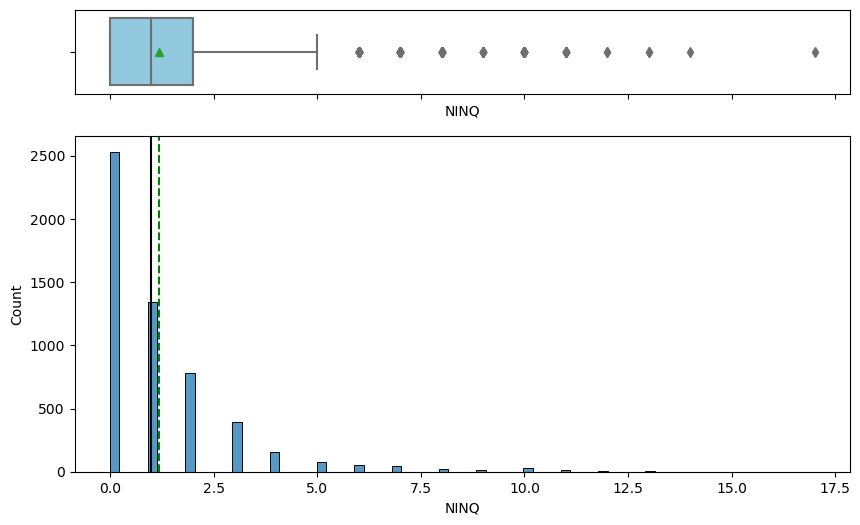

In [22]:
histogram_boxplot(df, 'NINQ')

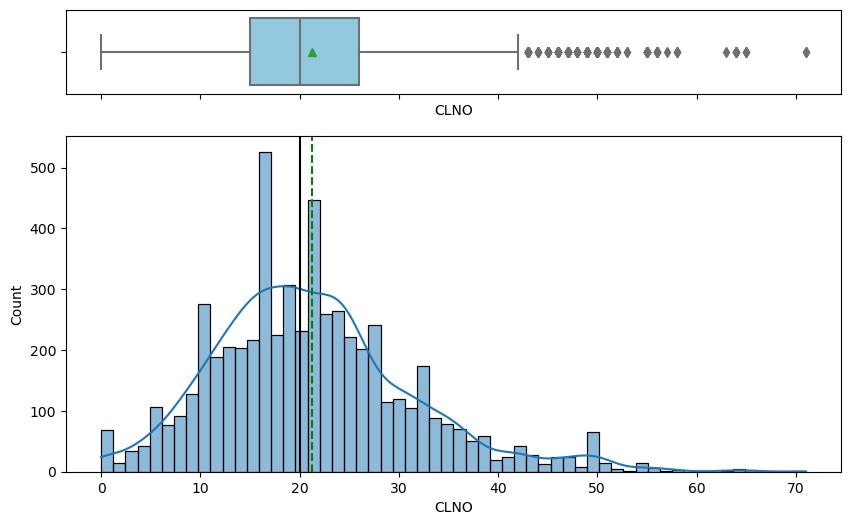

In [23]:
histogram_boxplot(df, 'CLNO', kde=True)

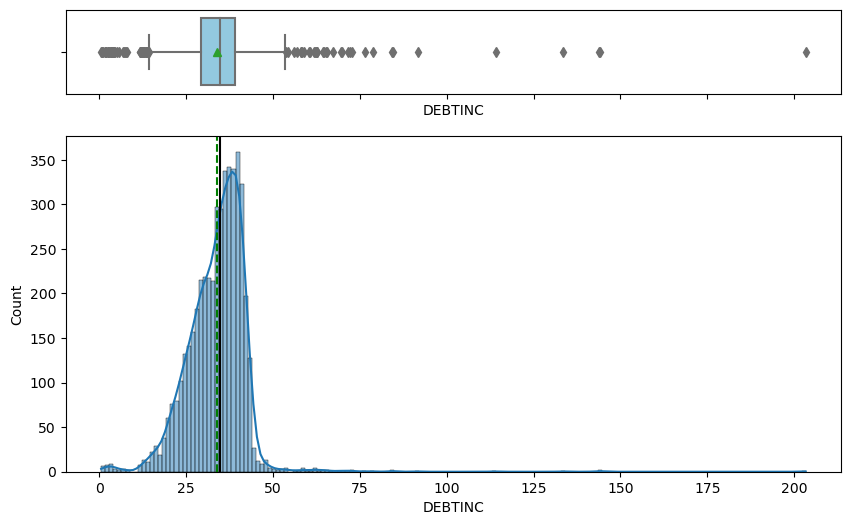

In [24]:
histogram_boxplot(df, 'DEBTINC', kde=True)

**Observations:**
- The shape of the debt-income ratio is odd, likely because loans to most people with debt-income ratio greater than 40-45 were denied loans. 
- This also has some very suspicious outliers. A ratio of >200 (or even >100) is someone with virtually no income and hundreds of thousands dollars in debt. While these people might exist, it's hard to imagine they would have been given a loan

### **Bivariate Analysis**

In [25]:
# Function for getting counts, % and plot of loan default/not by attribute
def status_by_feature(data, feature):
    """
    data = dataframe
    feature = variable of interest
    Plots out how different levels of a feature relate to target
    """
    ft_levels=list(data[feature].value_counts().index)  # levels of feature
    
    # iterate through levels of feature for count and default rate for each
    for i in ft_levels:
        print(f'{i} Counts:', data[data[feature]==i].BAD.count())  # counts for attr levels
        print(f'{i} Default %:', round(data[data[feature]==i].BAD.mean()*100, 2))  # % of attr levels
        print("-" * 50)

    # generate chart to display the distribution of levels within the feature
    sns.countplot(data, x=feature, hue='BAD', palette='Paired')
    plt.ylabel('# of Loans')
    plt.show()

Other Counts: 2388
Other Default %: 23.2
--------------------------------------------------
ProfExe Counts: 1276
ProfExe Default %: 16.61
--------------------------------------------------
Office Counts: 948
Office Default %: 13.19
--------------------------------------------------
Mgr Counts: 767
Mgr Default %: 23.34
--------------------------------------------------
Self Counts: 193
Self Default %: 30.05
--------------------------------------------------
Sales Counts: 109
Sales Default %: 34.86
--------------------------------------------------


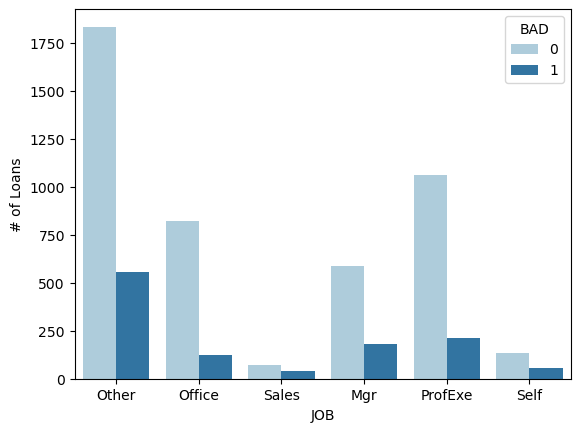

In [26]:
status_by_feature(df, 'JOB')

DebtCon Counts: 3928
DebtCon Default %: 18.97
--------------------------------------------------
HomeImp Counts: 1780
HomeImp Default %: 22.25
--------------------------------------------------


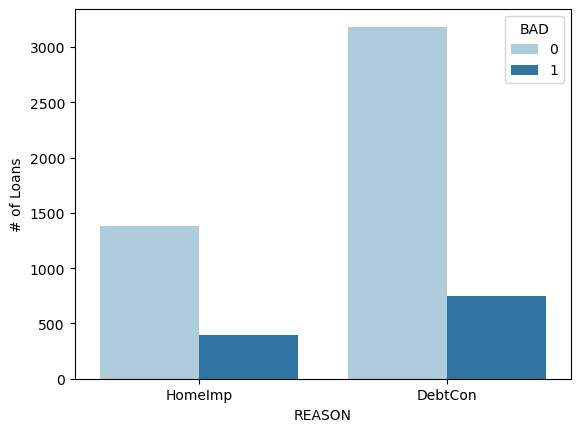

In [27]:
status_by_feature(df, 'REASON')

In [28]:
# Create function for violin plots split by loan defaul/not
def violinplot_by_status(data, feature):
    """
    data = dataframe
    feature = variable of interest
    Plots violin plots of variable, separated by loan status (default/paid)
    """
    fig, axs = plt.subplots(nrows=2, sharex=True, gridspec_kw = {"height_ratios": (0.35, 0.65)},figsize = (8,8))
    sns.violinplot(data=data, x=feature, y='BAD', orient='h', legend=False, ax=axs[0])
    sns.histplot(data=data, x=feature, hue='BAD', kde=True, ax=axs[1])
    plt.xlabel(feature)
    plt.show()

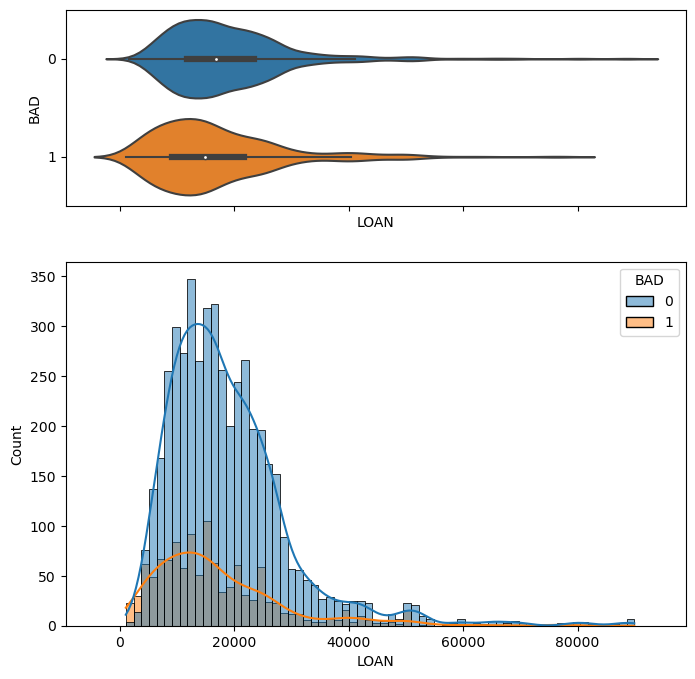

In [29]:
violinplot_by_status(df, 'LOAN')

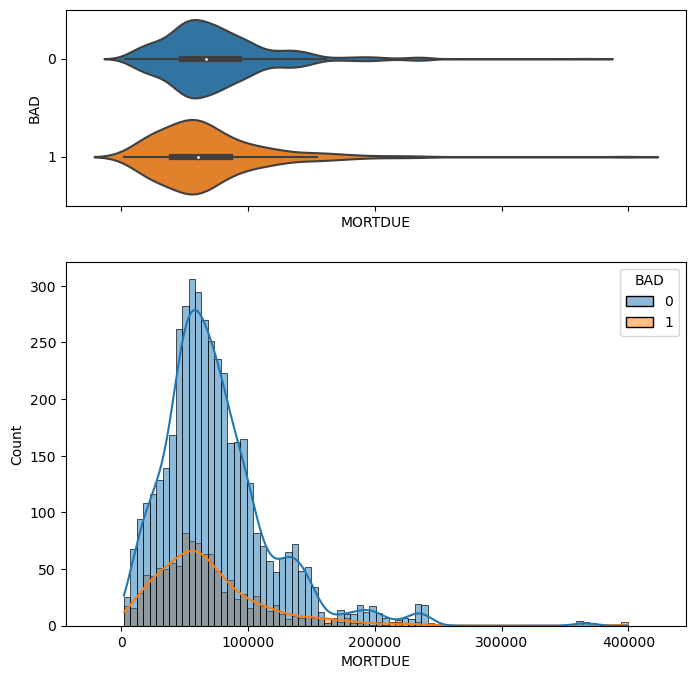

In [30]:
violinplot_by_status(df, 'MORTDUE')

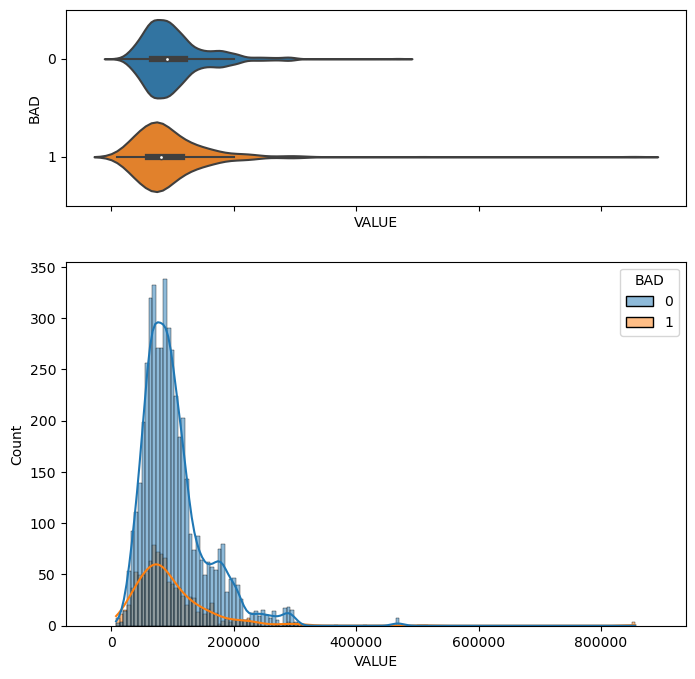

In [31]:
violinplot_by_status(df, 'VALUE')

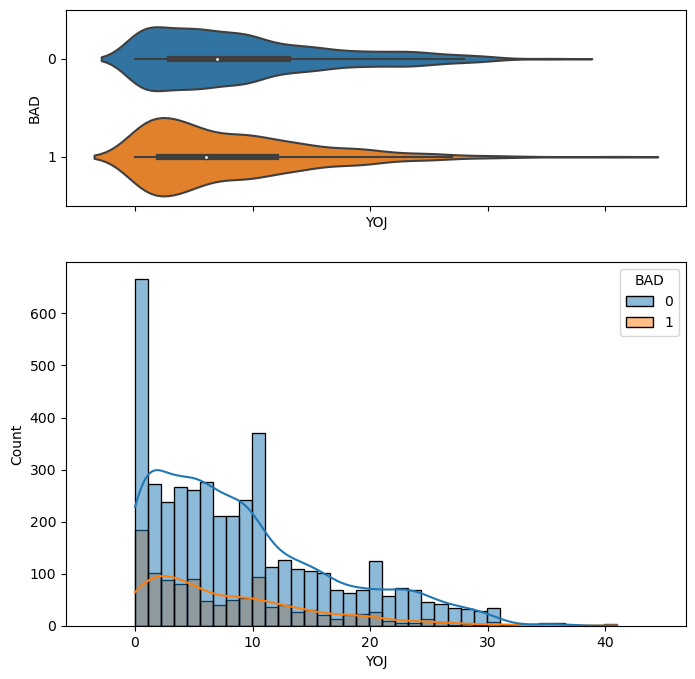

In [32]:
violinplot_by_status(df, 'YOJ')

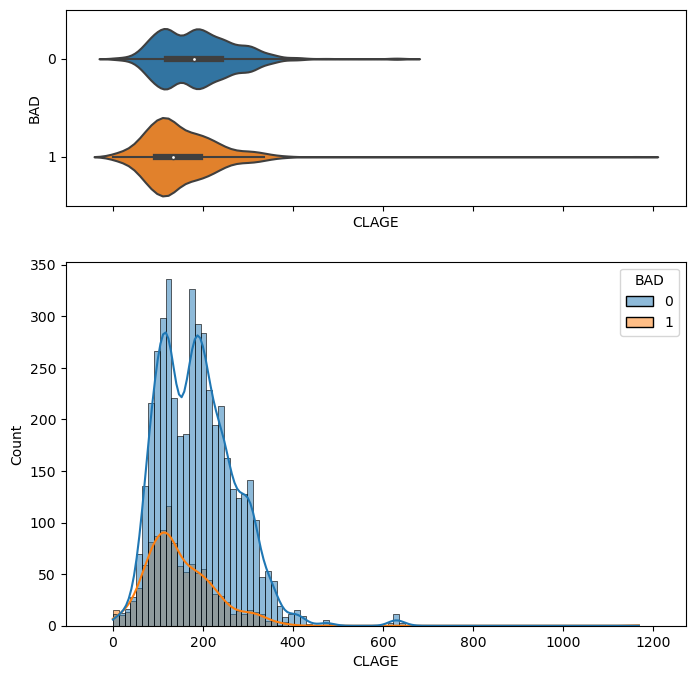

In [33]:
violinplot_by_status(df, 'CLAGE')

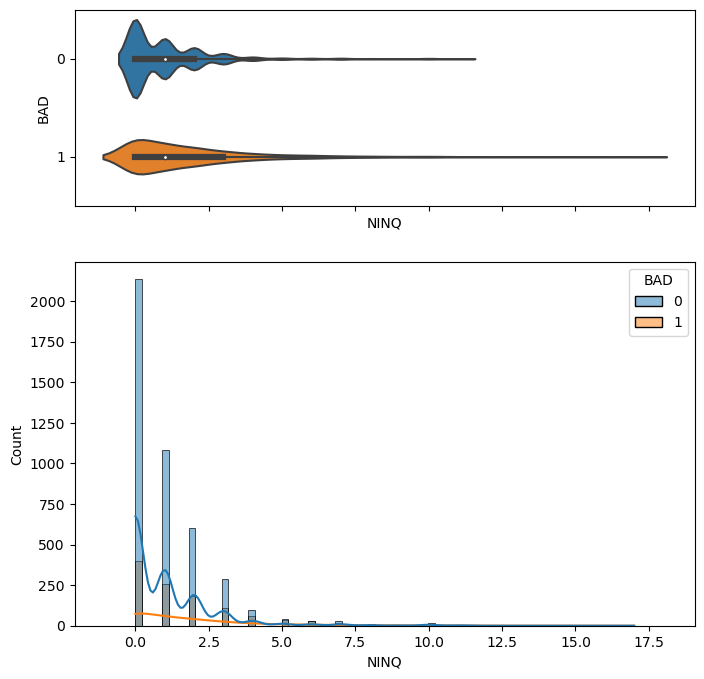

In [34]:
violinplot_by_status(df, 'NINQ')
# probably better with count plot instead

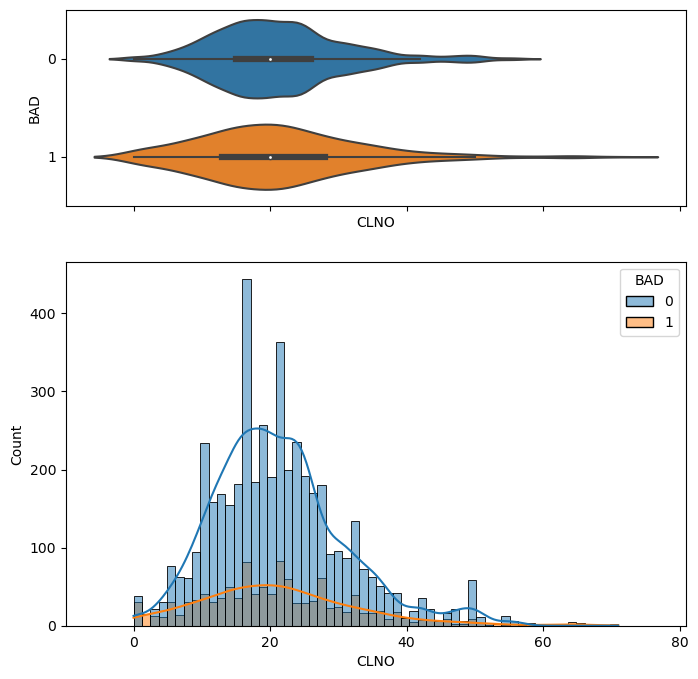

In [35]:
violinplot_by_status(df, 'CLNO')

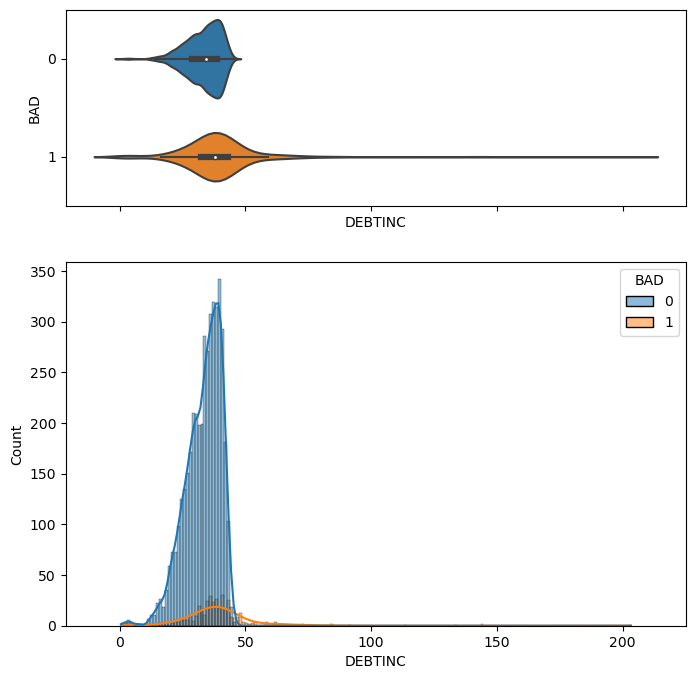

In [36]:
violinplot_by_status(df, 'DEBTINC')

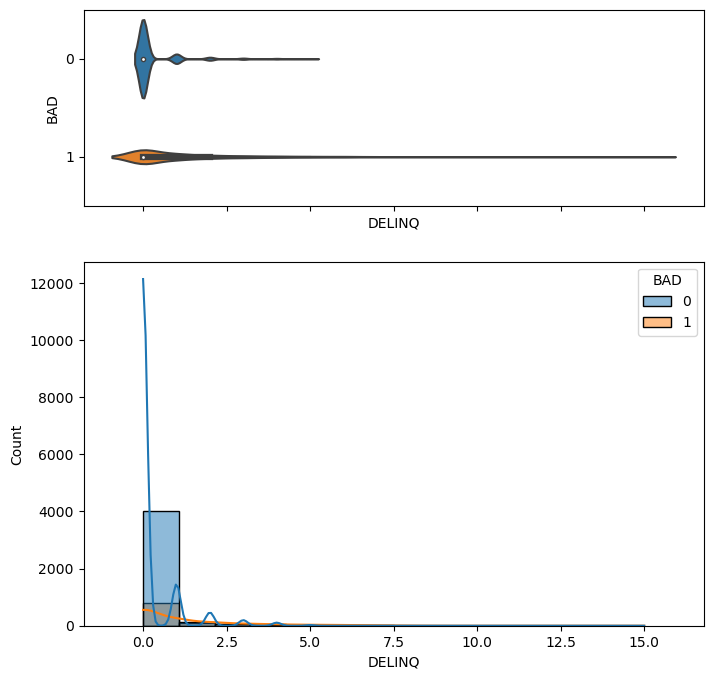

In [37]:
violinplot_by_status(df, 'DELINQ')

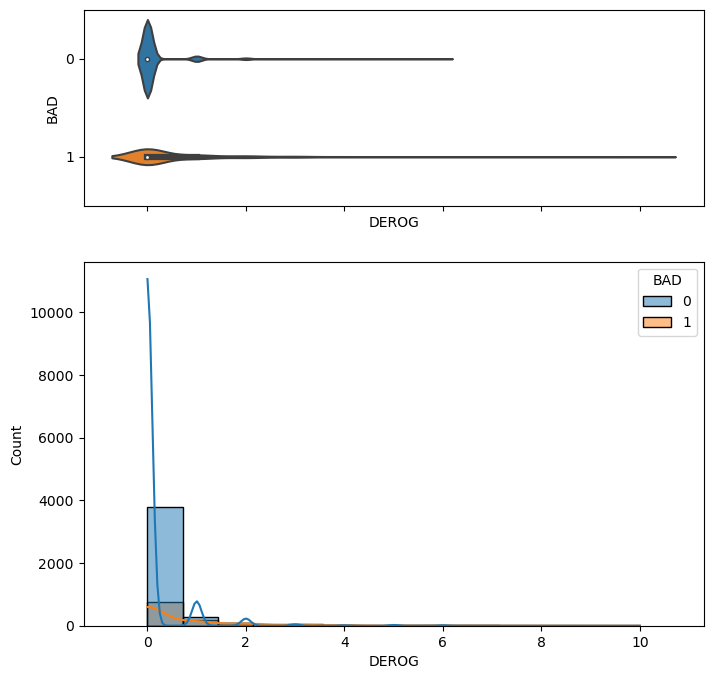

In [38]:
violinplot_by_status(df, 'DEROG')

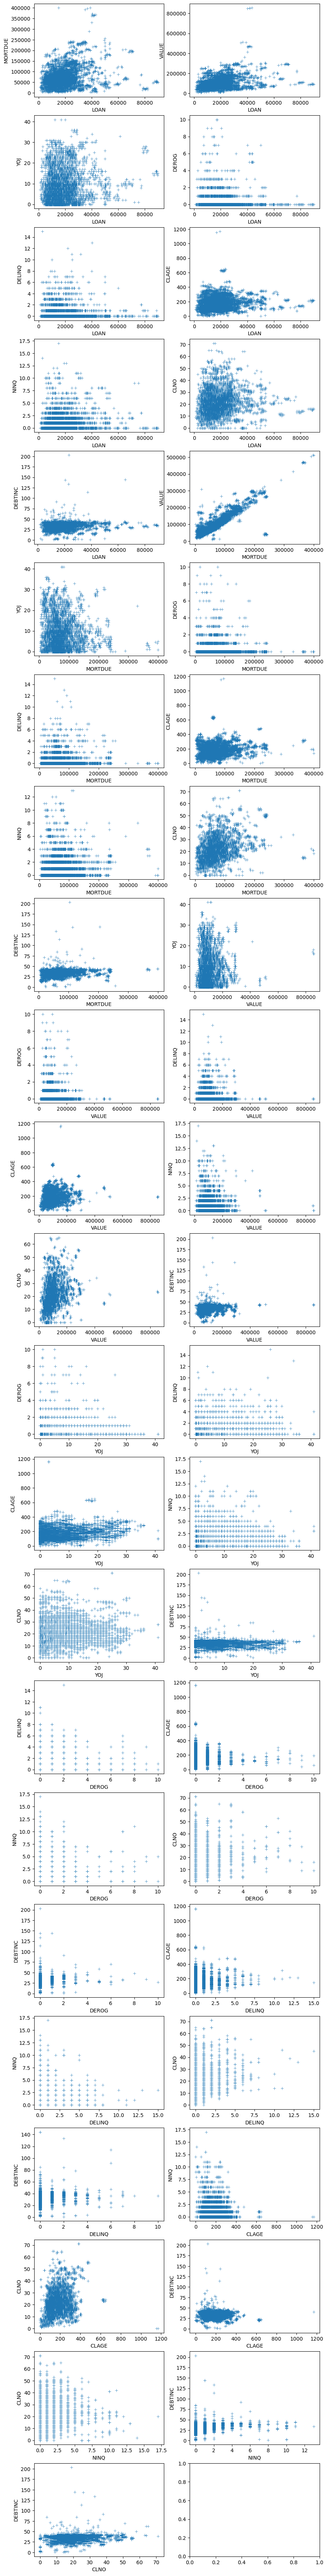

In [39]:
# Now let's look at relationships among the numeric variables
# Creating a set of pairwise scatterplots for numeric variables
col_names = df.drop(columns=['JOB', 'REASON', 'BAD']).columns  # list of numeric columns
n_cols = len(col_names)

# create list of paired variables
col_pairs=[]
for i in range(0, n_cols-1):
    for j in range(i+1, n_cols): # to only get unique pairs
        col_pairs.append([col_names[i], col_names[j]])

n_pairs=len(col_pairs)

# create subplots
# inverted floor division to get # rows
fig, axs = plt.subplots(ncols=2, nrows=-(n_pairs//-2), figsize=(10,n_pairs*2))

for i in range(0, n_pairs):
    sns.scatterplot(df, x=col_pairs[i][0], y=col_pairs[i][1], marker='+', ax=axs[i//2, i%2]) 
plt.show()

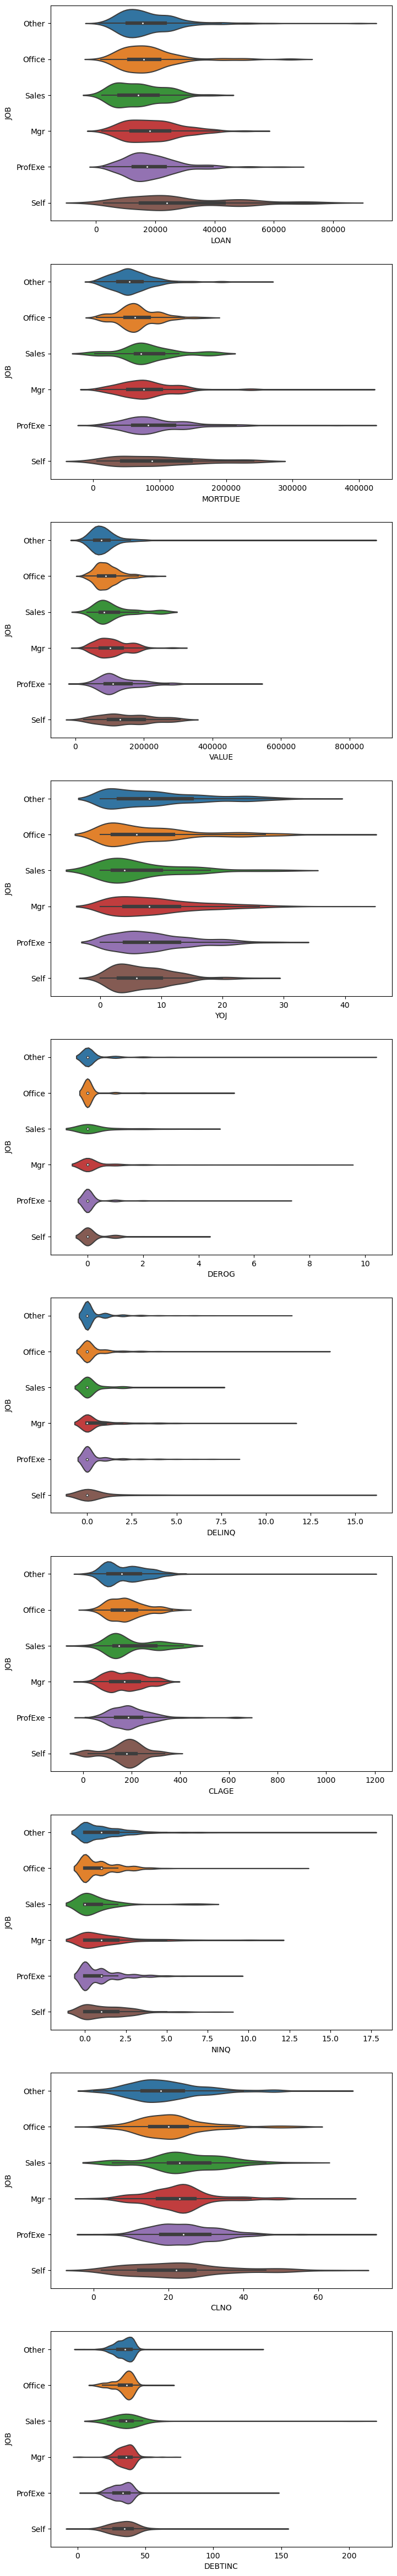

In [40]:
# Checking relationships between categorical and numeric variables (JOB, REASON)
# n_cols, col_names defined above
fig, axs = plt.subplots(nrows=n_cols, figsize = (8, n_cols*6))
for i in range(0, n_cols):
    sns.violinplot(df, x=col_names[i], y='JOB', orient='h', legend=False, ax=axs[i])
plt.show()

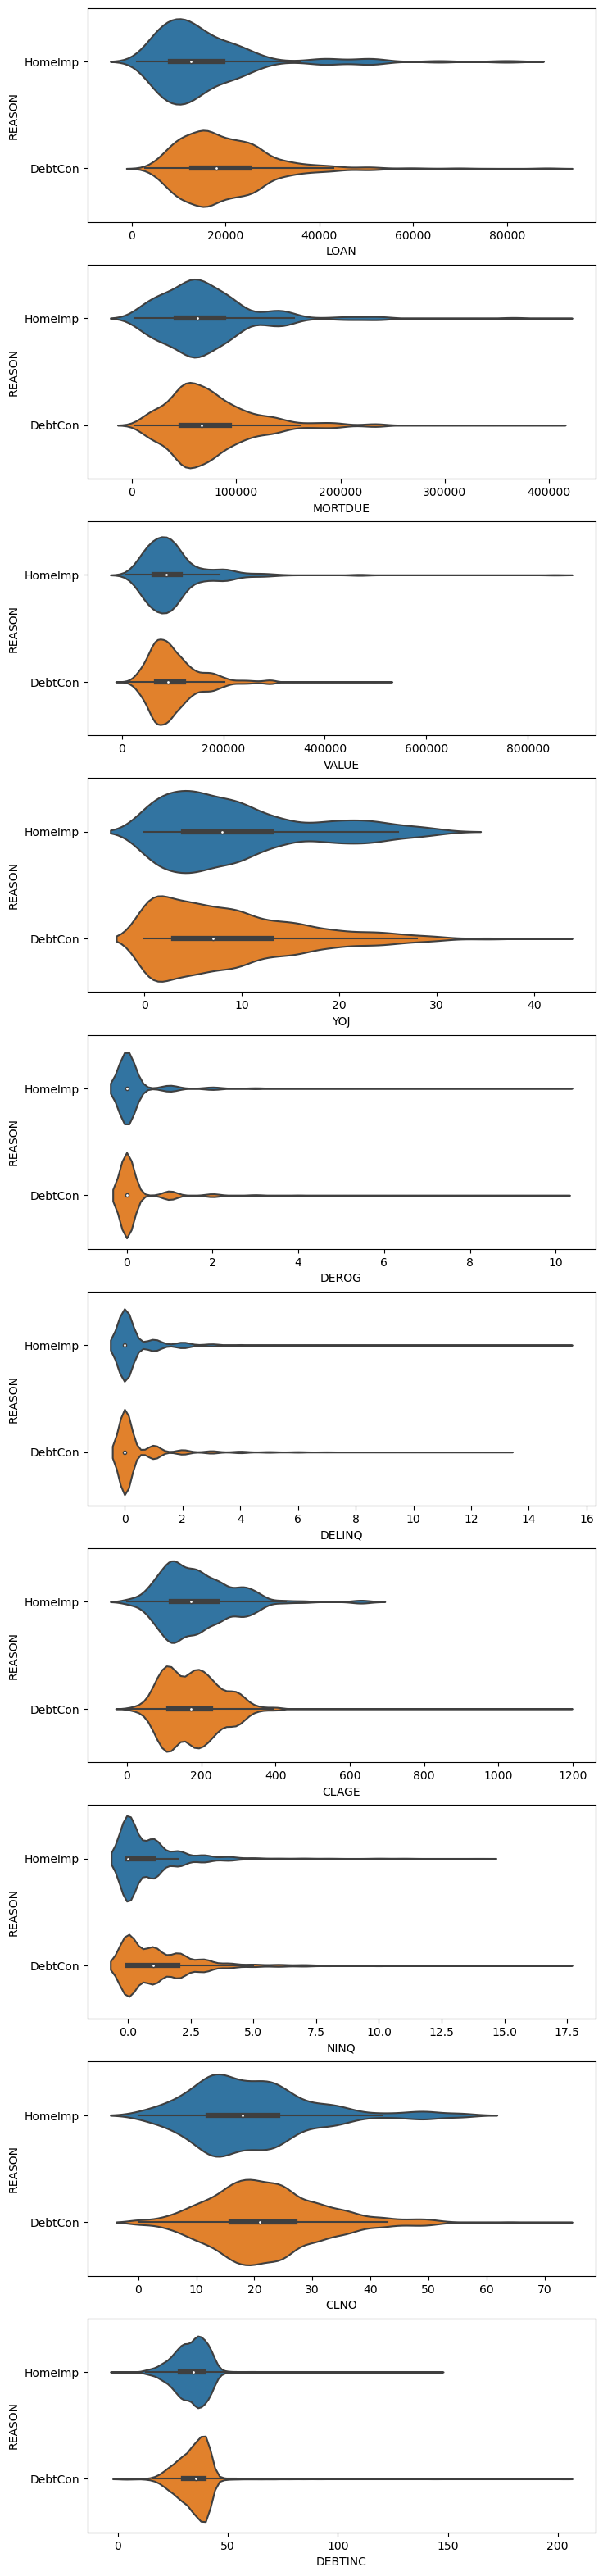

In [41]:
# And repeating for REASON
fig, axs = plt.subplots(nrows=n_cols, figsize = (8, n_cols*4))
for i in range(0, n_cols):
    sns.violinplot(df, x=col_names[i], y='REASON', orient='h', legend=False, ax=axs[i])
plt.show()

**Observations:**
- For many it isn't immediately obvious how some variables, alone or in combination, might differ between default or not default on loan. Differences are subtle on their own.
- Debt-to-income ratio, however, is one variable that shows a difference. All loans with a ratio above 50 were defaulted on. (Why were these loans approved?)
- Loans that defaulted are sometimes associated with more derogatory comments on credit file, more delinquent accounts
- There is a strong relationship between mortgage amount due (remaining) and value of property. This holds true whether or not loans were defaulted on
- Loan amount for debt consolidation tends to be slightly higher than for home improvement

In [41]:
# convert to category type
cat_col = ['BAD', 'REASON', 'JOB']

for i in cat_col:
    df[i] = pd.Categorical(df[i])

### **Multivariate Analysis**

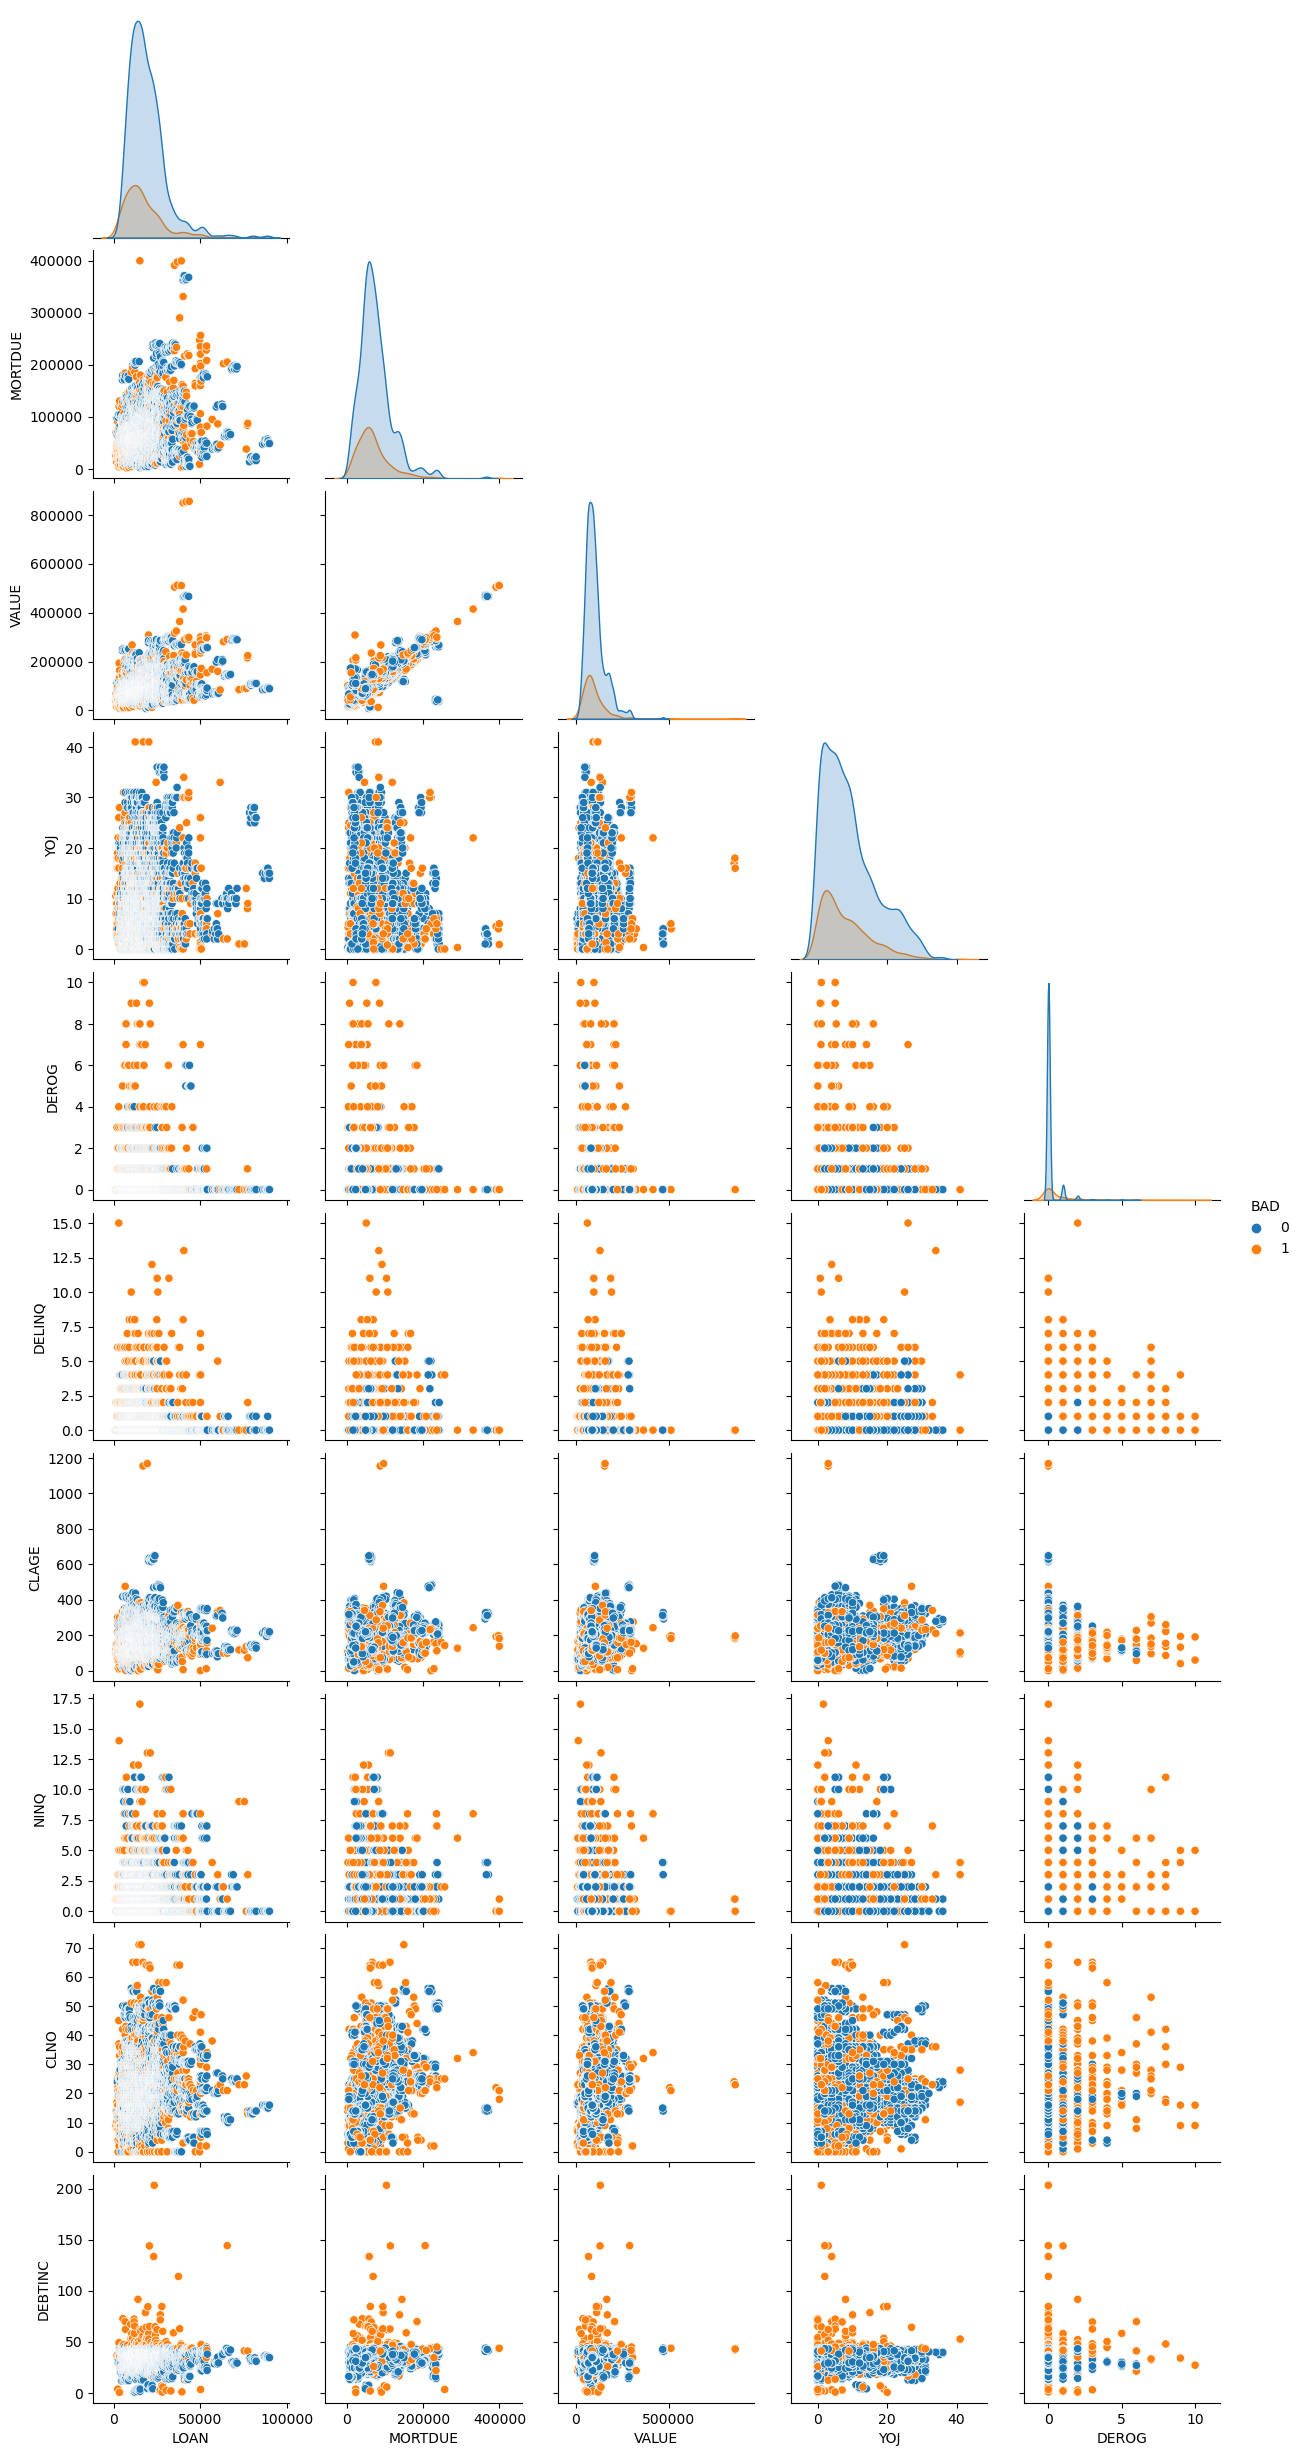

In [43]:
# Let's get an overview of how variables might be related
# There are a lot of variables, so I'm splitting the pairplot to make it readable

l=len(col_names)//2
col_set1=col_names[:l] # first half of columns
col_set2=col_names[l:] # second half of columns

sns.pairplot(df, x_vars=col_set1, y_vars=col_names, hue='BAD', corner=True)

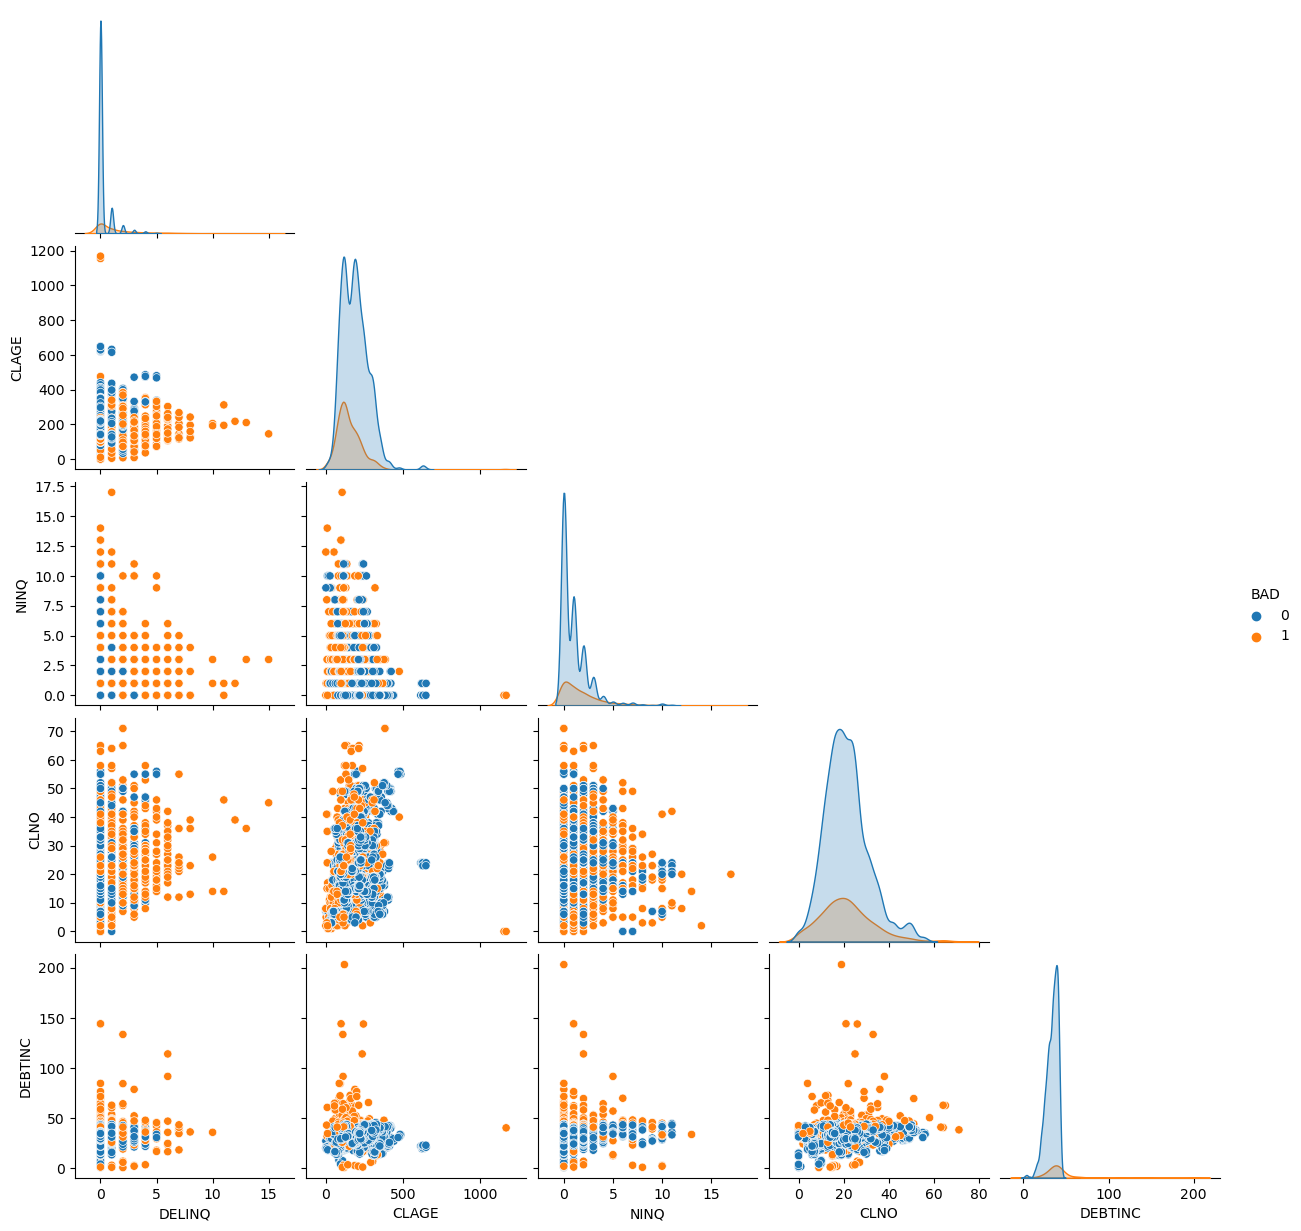

In [44]:
# Second half of pairplot
sns.pairplot(df, x_vars=col_set2, y_vars=col_set2, hue='BAD', corner=True)

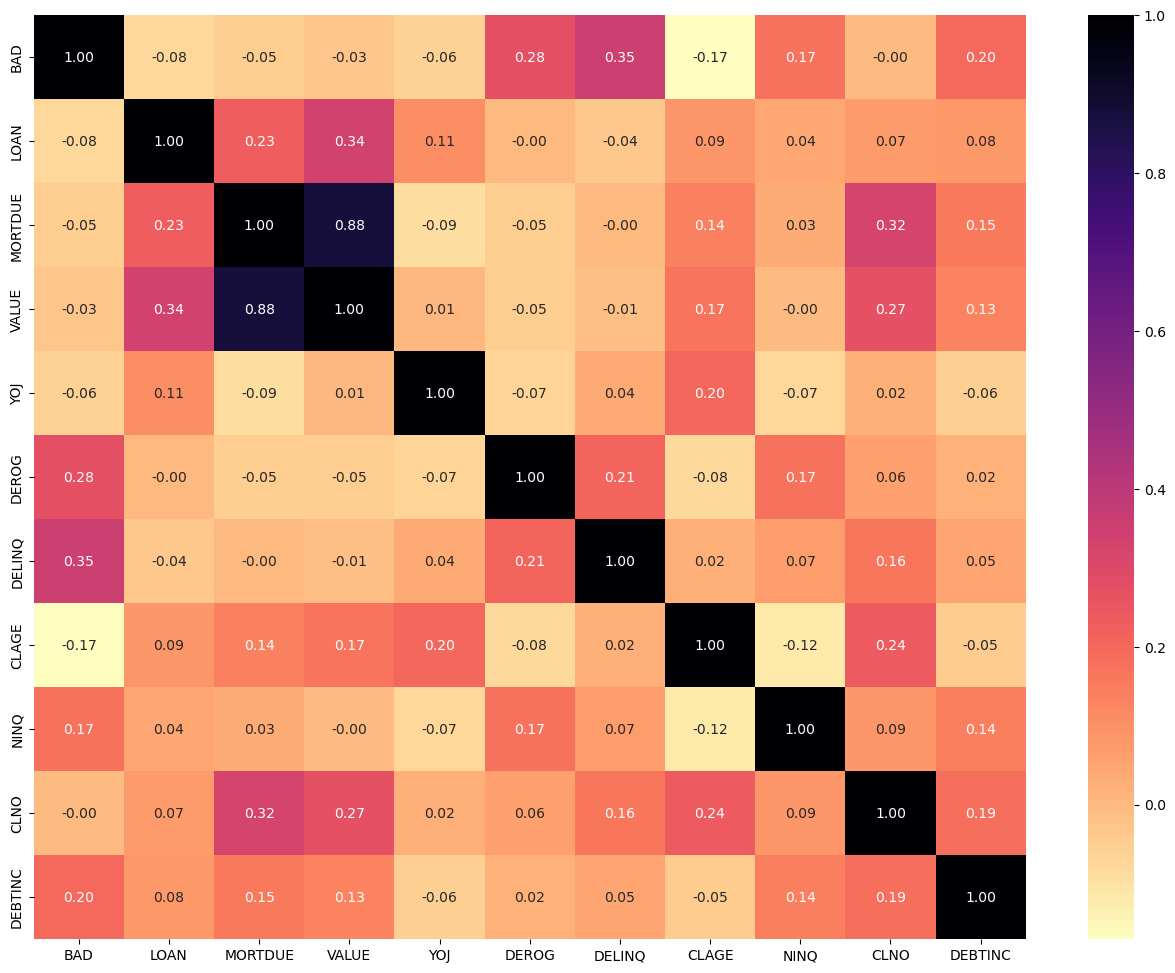

In [45]:
# checking heatmap of numerical variables
plt.figure(figsize = (16, 12))
sns.heatmap(df.drop(columns=['JOB', 'REASON']).corr(), 
            annot = True, fmt = '.2f', cmap='magma_r')
plt.show()

**Observations:**<br>
- Again we see the strong positive correlation between mortgage amount remaining and current value of property
- Years on the current job, value of property, # of credit lines, mortgage amount remaining and loan amount have almost no correlation to loan default
- Debt-to-income ration, # delinquent credit lines, # of derogatory comments have some positive correlation with loan default, while credit line age has a slight negative correlation with loan default

In [42]:
# backup copy, just in case
df_copy = df.copy()

## Treating Outliers

In [43]:
# Replace outliers beyond whiskers
def rep_outlier_numeric(df, feature):
    """
    Identifies and replaces outliers beyond 1.5*IQR from IQR
    df = dataframe
    feature = column to treat
    """
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    whisker = 1.5 * (q3 - q1)
    
    # define range
    lower_bound = q1 - whisker
    upper_bound = q3 + whisker
    
    # replace outliers
    df[feature] = np.clip(df[feature], lower_bound, upper_bound)
    return df

**Outliers:**
- For DELINQ and DEROG, more than 75% of the values are 0, so removing outliers would set all values in these columns to zero
- I think this is losing valuable information and don't see this as data to be removed, as it is representative of what future data could like like (provided that DELINQ < CLNO)
- There *WILL* be people applying for loans who have delinquent lines and/or derogatory reports, and the model should be able to take this into account
- Might be worthwhile to model with/without these columns (and outliers)

In [44]:
# list of all numeric variables from above: col_names
# interate through list to treat outliers in all
col_names = df.drop(columns=['JOB', 'REASON', 'BAD']).columns  # list of numeric columns
col_names = col_names.drop(['DELINQ', 'DEROG'])  # omit from treatment
for i in col_names:
    rep_outlier_numeric(df, i)

## Treating Missing Values

<Axes: >

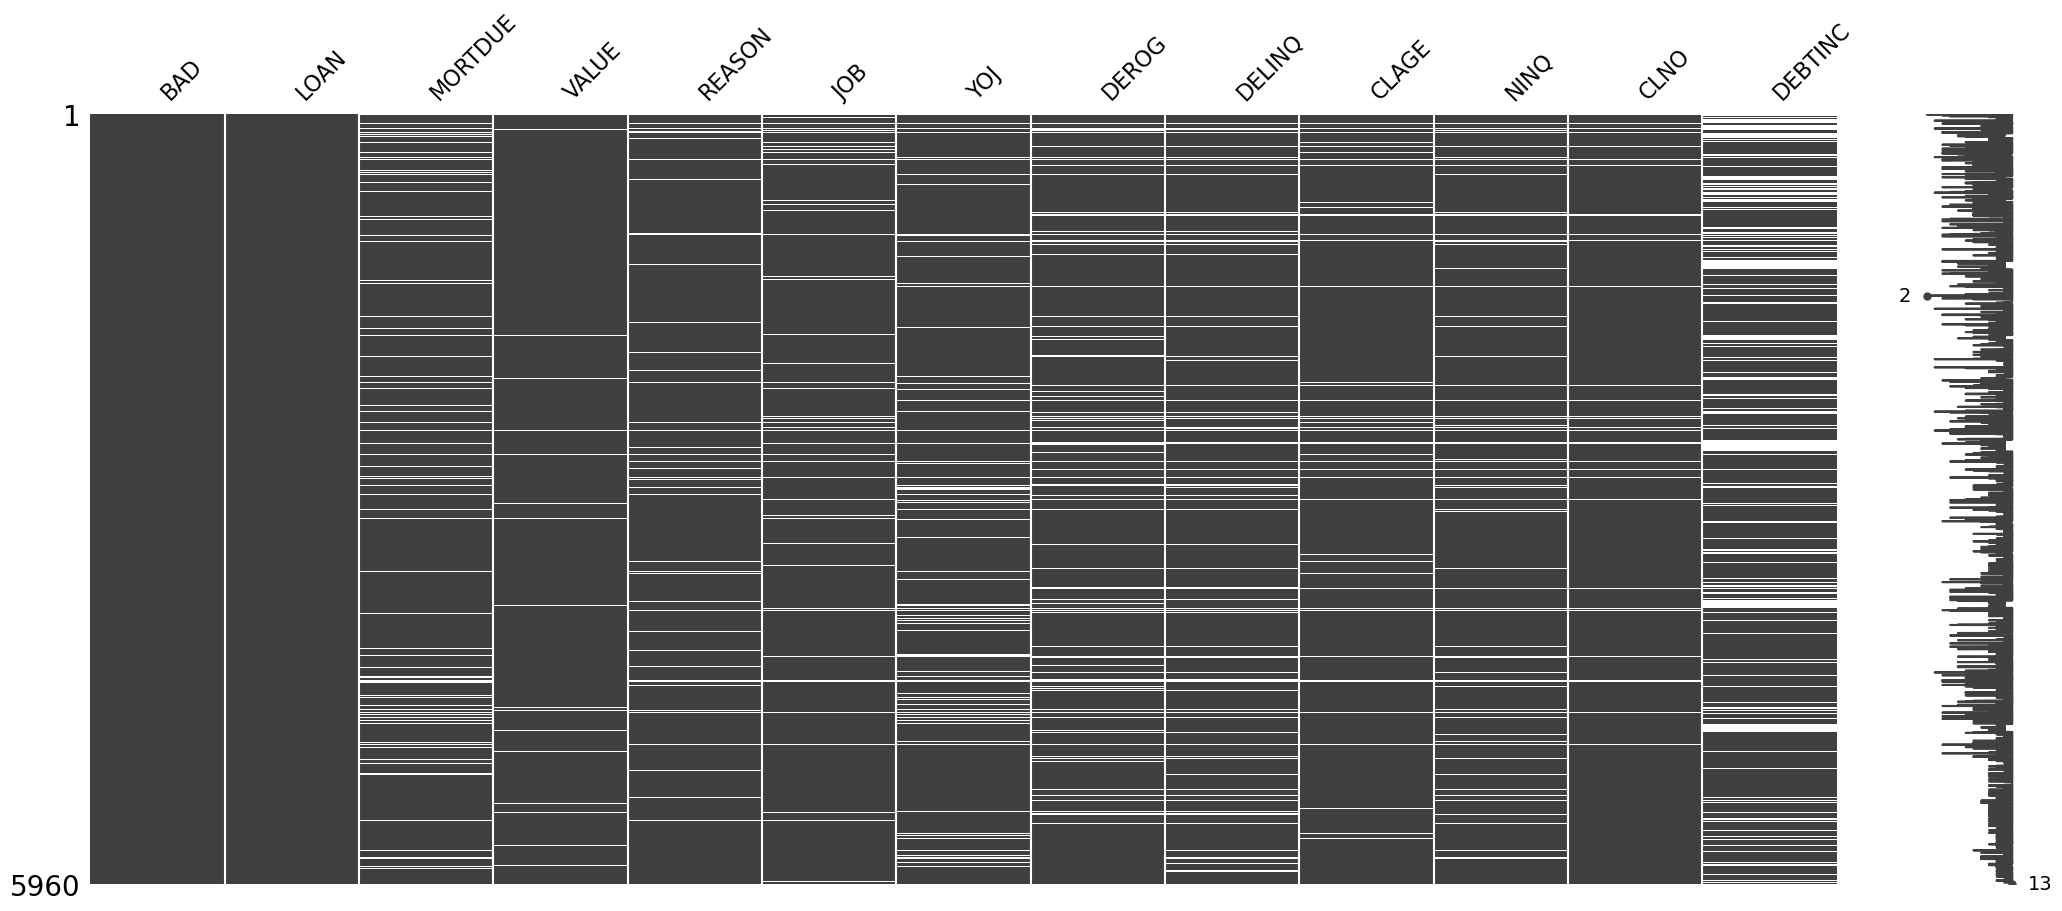

In [45]:
# Visualizing missing data (blank/white = missing)
import missingno as msno
msno.matrix(df)

<Axes: >

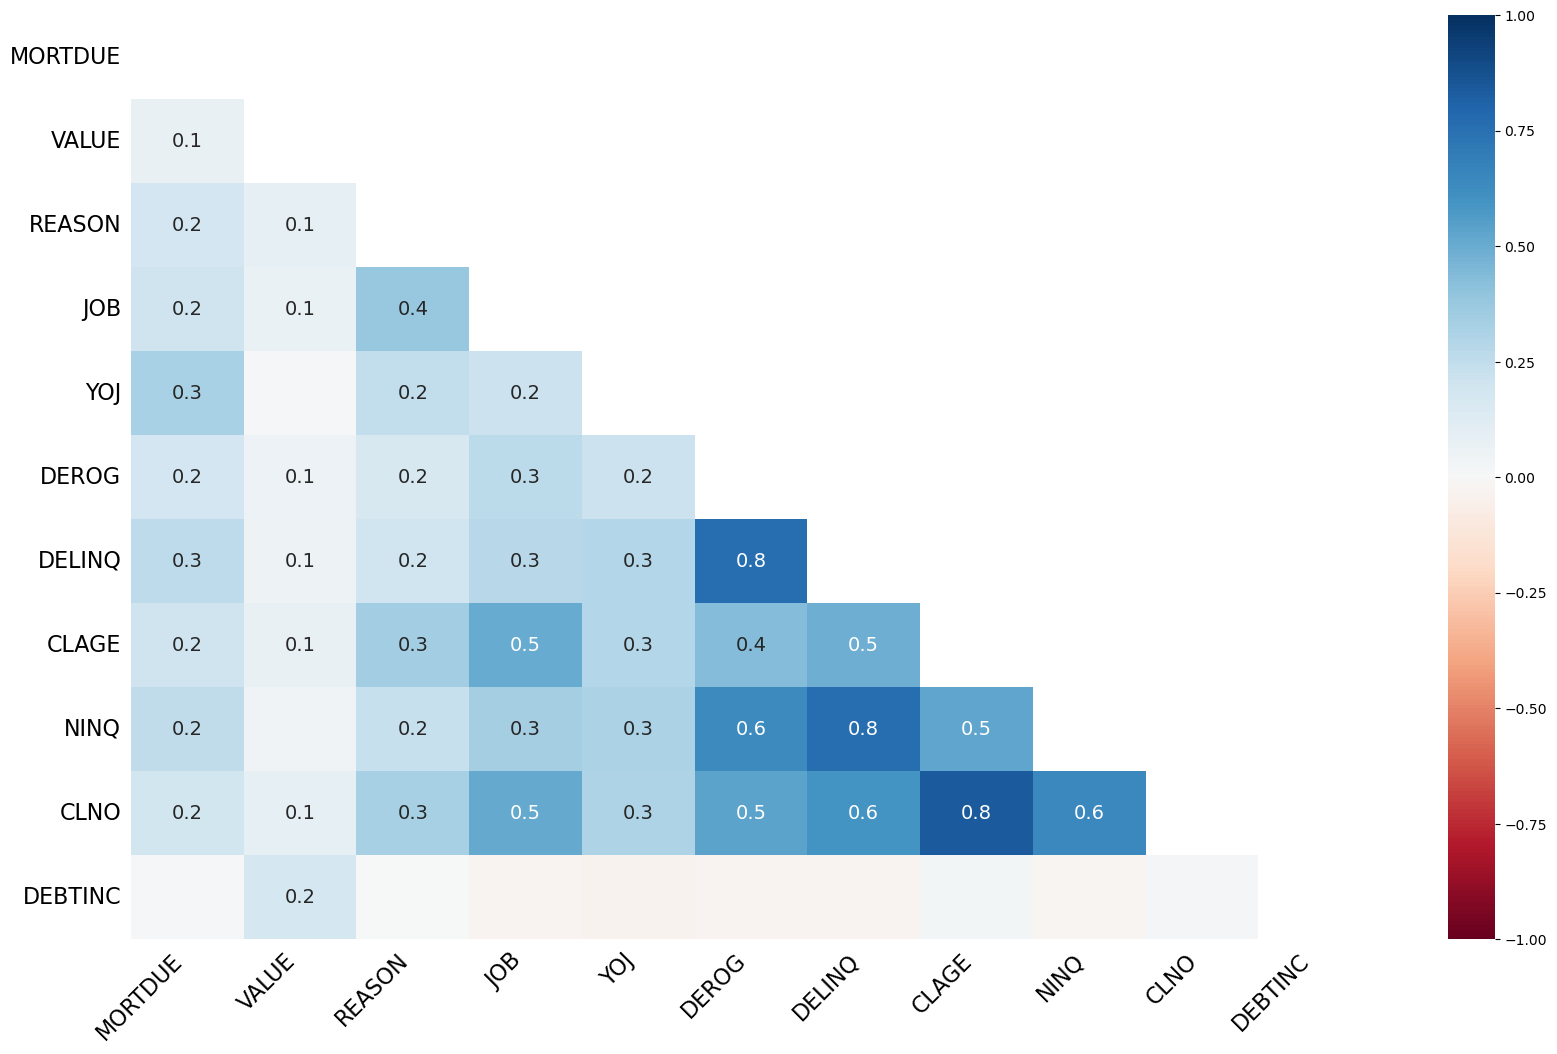

In [46]:
# Checking out relationships in missingness
msno.heatmap(df)

**Missing Data:**
- Only 'BAD' and 'LOAN' columns have no missing data
- Options are to drop rows (last resort), fill with 0, fill with mean/median/mode, impute with model or KNN
- Fill with 0 is not ideal here for most columns; neither is filling with mean due to skewed data
- Filling with mode for categorical and median for numeric is easiest solution

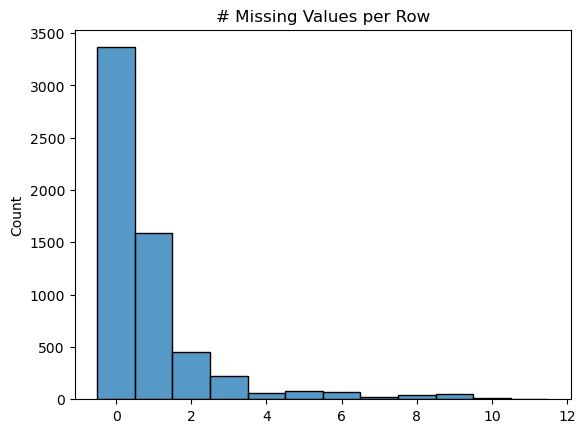

In [47]:
# plot missing value count by row
sns.histplot(df.isnull().sum(axis=1), discrete=True)
plt.title('# Missing Values per Row');

In [48]:
# functions to impute median (numeric) and mode (categorical)
def impute_median(df, feature):
    df[feature].fillna(df[feature].median(), inplace=True)

def impute_mode(df, feature):
    df[feature].fillna(df[feature].mode()[0], inplace=True)

In [49]:
# replace missing numeric data
col_names = df.drop(columns=['JOB', 'REASON', 'BAD']).columns
for i in col_names:
    impute_median(df, i)

# replace missing categorical data
cat_cols=['JOB', 'REASON']
for i in cat_cols:
    impute_mode(df, i)

# and check what the data looks like
df.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2   1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4   0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO    DEBTINC  
0   94.366667   1.0   9.0  34.818262  
1  121.833333   0.0  14.0  34.818262  
2  149.466667   1.0  10.0  34.818262  
3  173.466667   1.0  20.0  34.818262  
4   93.333333   0.0  14.0  34.818262

In [50]:
# check summary stats to make sure they are similar to before
# and that missing values have been filled
df.describe().T

count          mean           std          min           25%  \
LOAN     5960.0  18051.895973   9252.565294  1100.000000  11100.000000   
MORTDUE  5960.0  70997.067819  35597.710401  2063.000000  48139.000000   
VALUE    5960.0  98363.244470  44663.105774  8000.000000  66489.500000   
YOJ      5960.0      8.711300      7.122031     0.000000      3.000000   
DEROG    5960.0      0.224329      0.798458     0.000000      0.000000   
DELINQ   5960.0      0.405705      1.079256     0.000000      0.000000   
CLAGE    5960.0    178.368680     78.395960     0.000000    117.371430   
NINQ     5960.0      1.085403      1.312898     0.000000      0.000000   
CLNO     5960.0     20.994379      9.245170     0.000000     15.000000   
DEBTINC  5960.0     33.923529      6.348461    14.345367     30.763159   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   41600.000000  
MORTDUE  65019.000000   88200.250000  159306.000000  
VALUE    89235.500000  119004.750000  200447.375000  
YOJ          7.000000      12.000000      28.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     227.143058     406.230642  
NINQ         1.000000       2.000000       5.000000  
CLNO        20.000000      26.000000      42.500000  
DEBTINC     34.818262      37.949892      53.797805

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

- Number of delinquent credit lines and number of derogatory reports have the strongest correlation to loan default
- Number of credit lines has no correlation to loan default/repayment (could drop column)

# **Model Building**

## Data Preparation

In [51]:
# Data preparation:

# Separating the target variable and other variables
X = df.drop(columns = 'BAD')
Y = df['BAD']

# Feature engineering needed for categorical variables: 
# JOB, REASON
X = pd.get_dummies(X, drop_first=True, dtype=int)

# split into train/test, standard 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

## print out size of training/testing data
print("Shape of the training set: ", X_train.shape)   
print("Shape of the test set: ", X_test.shape)

# check distribution of target classes between train and test
print("\nPercentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print("\nPercentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (4172, 16)
Shape of the test set:  (1788, 16)

Percentage of classes in the training set:
BAD
0    0.803691
1    0.196309
Name: proportion, dtype: float64

Percentage of classes in the test set:
BAD
0    0.793065
1    0.206935
Name: proportion, dtype: float64


In [52]:
# Check test and train stats to ensure similarity
X_train.describe().T

count          mean           std          min           25%  \
LOAN            4172.0  18064.046021   9253.628976  1300.000000  11100.000000   
MORTDUE         4172.0  71340.154700  35526.413929  2063.000000  48593.000000   
VALUE           4172.0  98817.951170  44577.562739  8000.000000  66917.250000   
YOJ             4172.0      8.687740      7.114061     0.000000      3.000000   
DEROG           4172.0      0.210211      0.763066     0.000000      0.000000   
DELINQ          4172.0      0.391659      1.054273     0.000000      0.000000   
CLAGE           4172.0    178.119118     79.070412     0.000000    116.510638   
NINQ            4172.0      1.092042      1.312268     0.000000      0.000000   
CLNO            4172.0     21.017737      9.236538     0.000000     15.000000   
DEBTINC         4172.0     33.908495      6.353183    14.345367     30.651564   
REASON_HomeImp  4172.0      0.296021      0.456555     0.000000      0.000000   
JOB_Office      4172.0      0.159636      0.366312     0.000000      0.000000   
JOB_Other       4172.0      0.449185      0.497471     0.000000      0.000000   
JOB_ProfExe     4172.0      0.211409      0.408357     0.000000      0.000000   
JOB_Sales       4172.0      0.017498      0.131132     0.000000      0.000000   
JOB_Self        4172.0      0.029722      0.169840     0.000000      0.000000   

                         50%            75%            max  
LOAN            16300.000000   23300.000000   41600.000000  
MORTDUE         65019.000000   88624.000000  159306.000000  
VALUE           89235.500000  120000.000000  200447.375000  
YOJ                 7.000000      12.000000      28.000000  
DEROG               0.000000       0.000000      10.000000  
DELINQ              0.000000       0.000000      15.000000  
CLAGE             173.466667     226.942514     406.230642  
NINQ                1.000000       2.000000       5.000000  
CLNO               20.000000      26.000000      42.500000  
DEBTINC            34.818262      37.960666      53.797805  
REASON_HomeImp      0.000000       1.000000       1.000000  
JOB_Office          0.000000       0.000000       1.000000  
JOB_Other           0.000000       1.000000       1.000000  
JOB_ProfExe         0.000000       0.000000       1.000000  
JOB_Sales           0.000000       0.000000       1.000000  
JOB_Self            0.000000       0.000000       1.000000

In [53]:
X_test.describe().T

count          mean           std          min           25%  \
LOAN            1788.0  18023.545861   9252.609206  1100.000000  11100.000000   
MORTDUE         1788.0  70196.531762  35760.676215  4447.000000  46971.000000   
VALUE           1788.0  97302.262170  44856.643310  9500.000000  65737.250000   
YOJ             1788.0      8.766275      7.142282     0.000000      3.000000   
DEROG           1788.0      0.257271      0.874835     0.000000      0.000000   
DELINQ          1788.0      0.438479      1.135043     0.000000      0.000000   
CLAGE           1788.0    178.950992     76.817926     0.486711    120.236041   
NINQ            1788.0      1.069911      1.314603     0.000000      0.000000   
CLNO            1788.0     20.939877      9.267636     0.000000     15.000000   
DEBTINC         1788.0     33.958609      6.339067    14.345367     31.123635   
REASON_HomeImp  1788.0      0.304810      0.460456     0.000000      0.000000   
JOB_Office      1788.0      0.157718      0.364578     0.000000      0.000000   
JOB_Other       1788.0      0.443512      0.496938     0.000000      0.000000   
JOB_ProfExe     1788.0      0.220358      0.414604     0.000000      0.000000   
JOB_Sales       1788.0      0.020134      0.140499     0.000000      0.000000   
JOB_Self        1788.0      0.038591      0.192671     0.000000      0.000000   

                         50%            75%            max  
LOAN            16400.000000   23300.000000   41600.000000  
MORTDUE         65019.000000   87829.250000  159306.000000  
VALUE           89235.500000  117831.000000  200447.375000  
YOJ                 7.000000      13.000000      28.000000  
DEROG               0.000000       0.000000       9.000000  
DELINQ              0.000000       0.000000      10.000000  
CLAGE             173.466667     227.326848     406.230642  
NINQ                1.000000       2.000000       5.000000  
CLNO               20.000000      26.000000      42.500000  
DEBTINC            34.818262      37.910318      53.797805  
REASON_HomeImp      0.000000       1.000000       1.000000  
JOB_Office          0.000000       0.000000       1.000000  
JOB_Other           0.000000       1.000000       1.000000  
JOB_ProfExe         0.000000       0.000000       1.000000  
JOB_Sales           0.000000       0.000000       1.000000  
JOB_Self            0.000000       0.000000       1.000000

**Observation:** Training set has the higher value outliers for DELINQ and DEROG. Otherwise train and test data are similar

In [54]:
# Create copy of X test/train sets without DEROG and DELINQ to compare performance if all outliers were removed
# Splitting the data here means train/test datasets are otherwise identical

X_train_trim = X_train.copy()
X_train_trim.drop(columns=['DEROG', 'DELINQ'], inplace=True)

X_test_trim = X_test.copy()
X_test_trim.drop(columns=['DEROG', 'DELINQ'], inplace=True)

In [55]:
# Scale data for use in some models
scaler = StandardScaler()
#mmscaler = MinMaxScaler()

# Get list of features
feature_names = X_train.columns

# New copies of data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# fit to training data and transfor
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)

# transform test data
X_test_scaled = scaler.transform(X_test_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [56]:
# Function to print classification report and get confusion matrix in a proper format
def metrics_score(actual, predicted):  
    print("Accuracy:", round(accuracy_score(actual, predicted), 4))
    #print('\n')
    print(classification_report(actual, predicted))   
    cm = confusion_matrix(actual, predicted)   
    plt.figure(figsize = (4, 3))   
    sns.heatmap(cm, annot = True,  fmt = '.2f', cmap='Greens', 
                xticklabels = ['Repaid', 'Defaulted'], yticklabels = ['Repaid', 'Defaulted'])   
    plt.ylabel('Actual')   
    plt.xlabel('Predicted')    
    plt.show()

### Logistic Regression

In [57]:
# create model - using newton-cholesky as it's binary, not huge and relative small # features
lr = LogisticRegression(class_weight={0: 0.2, 1: 0.8})

# fit to data
lr.fit(X_train, y_train)

# predict on training data
lr_pred_train = lr.predict(X_train)

# predict on test data
lr_pred = lr.predict(X_test)

Accuracy: 0.6139
              precision    recall  f1-score   support

           0       0.88      0.60      0.72      3353
           1       0.29      0.65      0.40       819

    accuracy                           0.61      4172
   macro avg       0.58      0.63      0.56      4172
weighted avg       0.76      0.61      0.65      4172



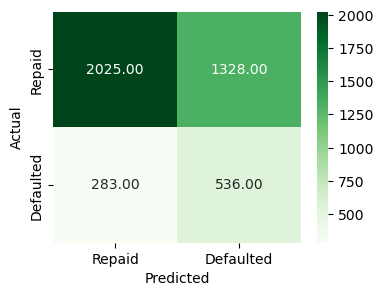

In [58]:
# Performance on training data
metrics_score(y_train, lr_pred_train)

Accuracy: 0.6236
              precision    recall  f1-score   support

           0       0.87      0.62      0.72      1418
           1       0.31      0.65      0.42       370

    accuracy                           0.62      1788
   macro avg       0.59      0.63      0.57      1788
weighted avg       0.76      0.62      0.66      1788



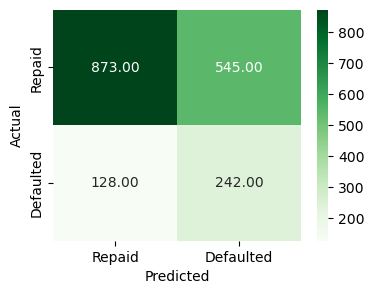

In [59]:
# Performance on test data
metrics_score(y_test, lr_pred)

**Treating *all* outliers**<br>
This results in all data for DEROG and DELINQ being 0, so those will be dropped

In [60]:
# create model for "trimmed" data
lr_trim = LogisticRegression(class_weight={0: 0.2, 1: 0.8})

# fit to data
lr_trim.fit(X_train_trim, y_train)

# predict on training data
lr_pred_train_trim = lr_trim.predict(X_train_trim)

# predict on test data
lr_pred_trim = lr_trim.predict(X_test_trim)

Accuracy: 0.6134
              precision    recall  f1-score   support

           0       0.88      0.60      0.72      3353
           1       0.29      0.65      0.40       819

    accuracy                           0.61      4172
   macro avg       0.58      0.63      0.56      4172
weighted avg       0.76      0.61      0.65      4172



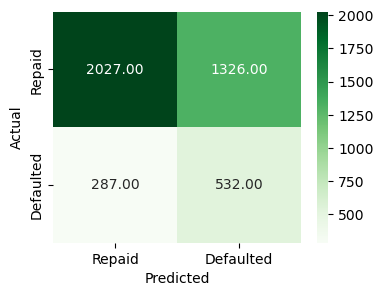

In [61]:
# Performance on training data
metrics_score(y_train, lr_pred_train_trim)

Accuracy: 0.623
              precision    recall  f1-score   support

           0       0.87      0.62      0.72      1418
           1       0.31      0.65      0.42       370

    accuracy                           0.62      1788
   macro avg       0.59      0.63      0.57      1788
weighted avg       0.75      0.62      0.66      1788



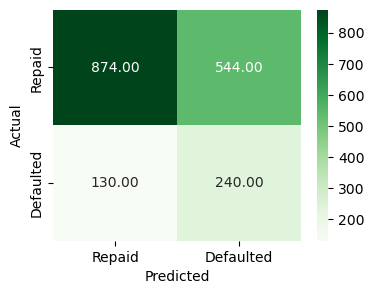

In [62]:
# Performance on test data
metrics_score(y_test, lr_pred_trim)

**Using standardized data**
StandardScaler was used for this. MinMax was also tried and yielded similar results.

In [63]:
# Now let's see what happens when we use standardized data
# create model - using newton-cholesky as it's binary, not huge and relative small # features
lr_scaled = LogisticRegression(class_weight={0: 0.2, 1: 0.8})

# fit to data
lr_scaled.fit(X_train_scaled, y_train)

# predict on training data
lr_scaled_pred_train = lr_scaled.predict(X_train_scaled)

# predict on test data
lr_scaled_pred = lr_scaled.predict(X_test_scaled)

Accuracy: 0.7526
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      3353
           1       0.42      0.66      0.51       819

    accuracy                           0.75      4172
   macro avg       0.66      0.72      0.67      4172
weighted avg       0.81      0.75      0.77      4172



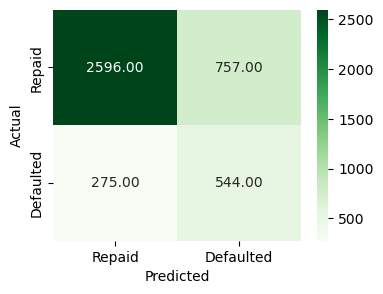

In [64]:
# Performance on training data
metrics_score(y_train, lr_scaled_pred_train)

Accuracy: 0.7528
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1418
           1       0.44      0.69      0.54       370

    accuracy                           0.75      1788
   macro avg       0.67      0.73      0.68      1788
weighted avg       0.81      0.75      0.77      1788



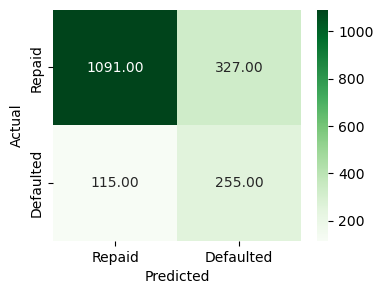

In [65]:
# Performance on test data
metrics_score(y_test, lr_scaled_pred)

**Observations:**
- Performance across the board is the same with outliers removed for DEROG and DELINQ
- Performance improves when using scaled data
- Relative performance of these models depends on the solver used

### Logistic Regression Hyperparameter Tuning

In [66]:
# Adjust hyperparameters of Logistic Regression
# create new lr
lr_tune = LogisticRegression()

# Grid of parameters to choose from
lr_params = {"solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
    "penalty": [None, 'l1', 'l2'],
    "C": [0.5, 1, 5],
    "class_weight": [{0: 0.2, 1: 0.8}]
}

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = make_scorer(f1_score, pos_label = 1)

# Run the grid search, using only sample due to grid size
# Narrow down grid and then re-run with all training data
grid_obj = GridSearchCV(lr_tune, lr_params, scoring=scorer, cv = 5)
grid_obj = grid_obj.fit(X_train_scaled, y_train)

# Set the classifier to the best combination of parameters
lr_tune = grid_obj.best_estimator_

# print out model parameters
grid_obj.best_params_

{'C': 0.5,
 'class_weight': {0: 0.2, 1: 0.8},
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [67]:
# predict on training data
lr_tune_pred_train = lr_tune.predict(X_train_scaled)

# predict on test data
lr_tune_pred = lr_tune.predict(X_test_scaled)

Accuracy: 0.7536
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      3353
           1       0.42      0.67      0.51       819

    accuracy                           0.75      4172
   macro avg       0.66      0.72      0.67      4172
weighted avg       0.81      0.75      0.77      4172



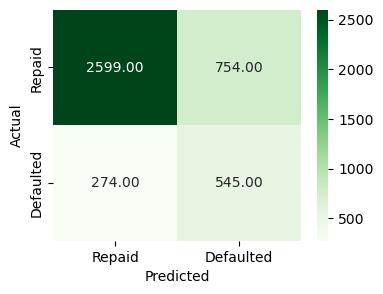

In [68]:
# Performance on training data
metrics_score(y_train, lr_tune_pred_train)

Accuracy: 0.7522
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1418
           1       0.44      0.69      0.54       370

    accuracy                           0.75      1788
   macro avg       0.67      0.73      0.68      1788
weighted avg       0.81      0.75      0.77      1788



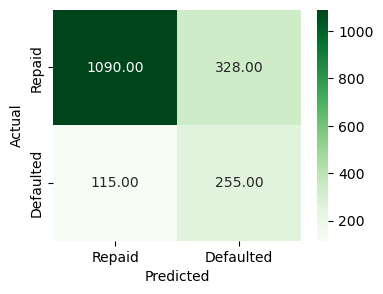

In [69]:
# Performance on test data
metrics_score(y_test, lr_tune_pred)

**Observations:**
- Tuned model from grid search performs the same as the model on scaled data, as the grid search found that the default parameters were about the best
- Tuned model still has poor precision, particularly for defaulted loans
- Metrics are mediocre at best, with accuracy lower than that of assigning all data to BAD=0 (repaid)
- Neither the initial model or the tuned one are that good. Hopefully another classification method works better

In [70]:
# How do the features relate to the best logistic model? 

# get coefficients and convert to odds
odds = np.exp(lr_tune.coef_[0])

# turn into df and sort descending
pd.DataFrame(odds, feature_names, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

odds
DELINQ          2.332140
DEBTINC         1.625159
DEROG           1.577236
NINQ            1.313468
JOB_Sales       1.193569
REASON_HomeImp  1.090898
JOB_Self        1.076776
VALUE           1.054611
JOB_Other       1.010885
JOB_ProfExe     1.006641
YOJ             0.924927
MORTDUE         0.892848
LOAN            0.820958
CLNO            0.802039
JOB_Office      0.766370
CLAGE           0.628553

**Observations:**
- Biggest predictors of loan default are: delinquent credit line(s), debt-to-income ratio, and derogatory reports
- Credit line age  has odds less than 1, indicating that longer credit history is associated with loan repayment
- Job, particularly "Other", "Exec" have little predictive value

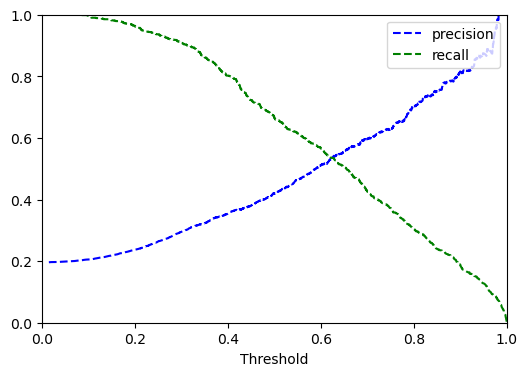

In [71]:
# Using the tuned logistic regression, plotting the precision-recall curve

# get probability of each observation belonging to each class
y_prob_lr = lr_tune.predict_proba(X_train_scaled) 

precision_lr, recall_lr, threshold_lr = precision_recall_curve(y_train, y_prob_lr[:, 1])

# Plot values of precision, recall, and threshold
plt.figure(figsize = (6, 4))
plt.plot(threshold_lr, precision_lr[:-1], 'b--', label = 'precision')
plt.plot(threshold_lr, recall_lr[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

**Observation:** Optimal threshold is ~0.3. Re-score the data with this

Accuracy: 0.8152
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3353
           1       0.53      0.54      0.53       819

    accuracy                           0.82      4172
   macro avg       0.71      0.71      0.71      4172
weighted avg       0.82      0.82      0.82      4172



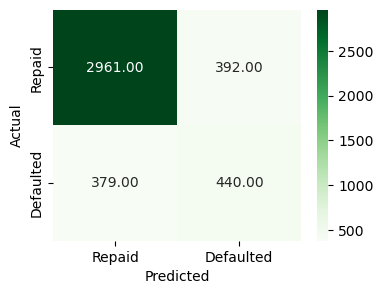

In [72]:
optimum = 0.62
metrics_score(y_train, y_prob_lr[:, 1] > optimum)

Accuracy: 0.8082
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1418
           1       0.53      0.56      0.55       370

    accuracy                           0.81      1788
   macro avg       0.71      0.72      0.71      1788
weighted avg       0.81      0.81      0.81      1788



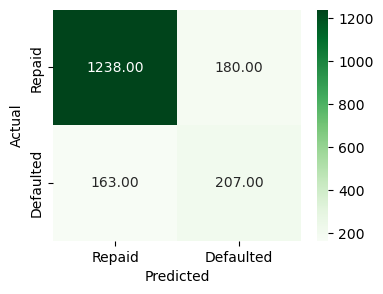

In [73]:
# Get probabilities for test data and score with defined optimum
prob_lr = lr_tune.predict_proba(X_test_scaled) 
metrics_score(y_test, prob_lr[:, 1] > optimum)

In [74]:
# apply optimal threshold to create new prediction columns for test & train data
# for later use in comparing metrics
lr_tune_opt_pred = [1 if i > optimum else 0 for i in prob_lr[:, 1]]  # test
lr_tune_opt_pred_tr = [1 if i > optimum else 0 for i in y_prob_lr[:, 1]]  # train

**Observations:**
- Finding optimal threshold and applying that to the tuned model increased accuracy and precision
- Overall performace is still not that great
- Balance of types of errors has shifted - roughly equal; tuned model was overly conservative, lots of false positives
- This strikes a better balance of the 2 types of error

## Decision Tree Classifier

In [75]:
# created and fit decision tree model
# setting class weights of 0.2, 0.8 based on split in target classes (0.8, 0.2)
dtree = DecisionTreeClassifier(random_state = 101, class_weight={0: 0.2, 1: 0.8})
dtree.fit(X_train, y_train)

# predict on training data
dt_pred_tr = dtree.predict(X_train)

# predict on test data
dt_pred = dtree.predict(X_test)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3353
           1       1.00      1.00      1.00       819

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



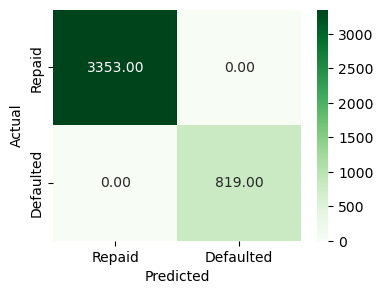

In [76]:
# assess performance on training data
metrics_score(y_train, dt_pred_tr)

Accuracy: 0.844
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1418
           1       0.63      0.61      0.62       370

    accuracy                           0.84      1788
   macro avg       0.76      0.76      0.76      1788
weighted avg       0.84      0.84      0.84      1788



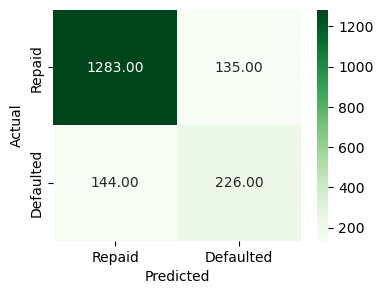

In [77]:
# assess performance on test data
metrics_score(y_test, dt_pred)

**Observations:**
- Overfitting, as expected for decision tree, although performance on test data isn't terrible
- Before tuning, decision tree is performing better than logistic regression

In [78]:
# How does a model perform if it's trained on data that is not processed
# Data that has missing data and outliers

# Separating the target variable and other variables
X_raw = df_copy.drop(columns = 'BAD')
Y_raw = df_copy['BAD']

# Feature engineering needed for categorical variables: 
# JOB, REASON into binary (not bool)
X_raw = pd.get_dummies(X_raw, drop_first=True, dtype=int)

# split into train/test, standard 70/30 split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_raw, Y_raw, test_size = 0.30, random_state = 101)

## print out size of training/testing data
print("Shape of the training set: ", X_train_r.shape)   
print("Shape of the test set: ", X_test_r.shape)

# check distribution of target classes between train and test
print("\nPercentage of classes in the training set:")
print(y_train_r.value_counts(normalize = True))
print("\nPercentage of classes in the test set:")
print(y_test_r.value_counts(normalize = True))

Shape of the training set:  (4172, 16)
Shape of the test set:  (1788, 16)

Percentage of classes in the training set:
BAD
0    0.803691
1    0.196309
Name: proportion, dtype: float64

Percentage of classes in the test set:
BAD
0    0.793065
1    0.206935
Name: proportion, dtype: float64


In [79]:
# create and fit decision tree model
# setting class weights of 0.2, 0.8 based on split in target classes (0.8, 0.2)
dtree_r = DecisionTreeClassifier(random_state = 101, class_weight={0: 0.2, 1: 0.8})
dtree_r.fit(X_train_r, y_train_r)

# predict on training data
dt_pred_r_tr = dtree_r.predict(X_train_r)

# predict on test data
dt_pred_r = dtree_r.predict(X_test_r)

Accuracy: 0.9657
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3353
           1       0.87      0.97      0.92       819

    accuracy                           0.97      4172
   macro avg       0.93      0.97      0.95      4172
weighted avg       0.97      0.97      0.97      4172



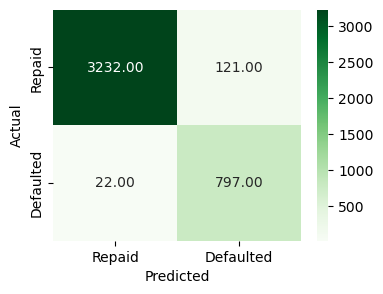

In [80]:
# assess performance on training data
metrics_score(y_train_r, dt_pred_r_tr)

Accuracy: 0.8652
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1418
           1       0.66      0.72      0.69       370

    accuracy                           0.87      1788
   macro avg       0.79      0.81      0.80      1788
weighted avg       0.87      0.87      0.87      1788



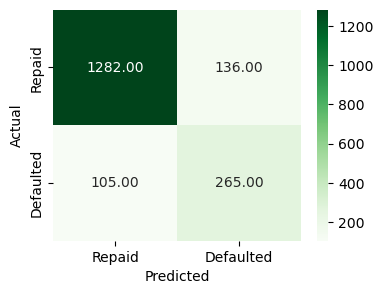

In [81]:
# assess performance on test data
metrics_score(y_test_r, dt_pred_r)

In [82]:
# How does a model perform if it's trained on data that is not processed
# Data that has missing data, but no outliers

# Separating the target variable and other variables
X_no = df_copy.copy().drop(columns = ['BAD', 'DEROG', 'DELINQ'])
Y_no = df_copy['BAD']

# list of all numeric variables from above: col_names
# interate through list to treat outliers in all
col_names = X_no.select_dtypes(include='number').columns
for i in col_names:
    rep_outlier_numeric(X_no, i)

# Feature engineering needed for categorical variables: 
# JOB, REASON
X_no = pd.get_dummies(X_no, drop_first=True, dtype=int)

# split into train/test, standard 70/30 split
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, Y_no, test_size = 0.30, random_state = 101)

## print out size of training/testing data
print("Shape of the training set: ", X_train_no.shape)   
print("Shape of the test set: ", X_test_no.shape)

# check distribution of target classes between train and test
print("\nPercentage of classes in the training set:")
print(y_train_no.value_counts(normalize = True))
print("\nPercentage of classes in the test set:")
print(y_test_no.value_counts(normalize = True))

Shape of the training set:  (4172, 14)
Shape of the test set:  (1788, 14)

Percentage of classes in the training set:
BAD
0    0.803691
1    0.196309
Name: proportion, dtype: float64

Percentage of classes in the test set:
BAD
0    0.793065
1    0.206935
Name: proportion, dtype: float64


In [83]:
X_train_no.head()

LOAN  MORTDUE    VALUE   YOJ       CLAGE  NINQ  CLNO    DEBTINC  \
2253  13800  31974.0  44417.0   7.0   76.933123   1.0  12.0  30.422429   
5354  30400  40386.0  68120.0  12.0   98.820154   5.0  15.0  34.020257   
4342  22600  63363.0  90816.0   3.0  174.326561   NaN  15.0  38.742482   
3405  18000  52301.0  79959.0   1.0  290.280648   0.0   9.0  37.163698   
2112  13300  64002.0  88174.0   3.0  157.916990   NaN  34.0  29.798231   

      REASON_HomeImp  JOB_Office  JOB_Other  JOB_ProfExe  JOB_Sales  JOB_Self  
2253               1           0          1            0          0         0  
5354               0           0          0            0          0         0  
4342               0           1          0            0          0         0  
3405               0           0          1            0          0         0  
2112               0           0          1            0          0         0

Accuracy: 0.9453
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3353
           1       0.83      0.92      0.87       819

    accuracy                           0.95      4172
   macro avg       0.90      0.93      0.92      4172
weighted avg       0.95      0.95      0.95      4172



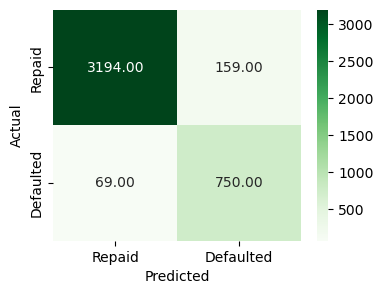

Accuracy: 0.8523
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1418
           1       0.63      0.70      0.66       370

    accuracy                           0.85      1788
   macro avg       0.77      0.80      0.78      1788
weighted avg       0.86      0.85      0.86      1788



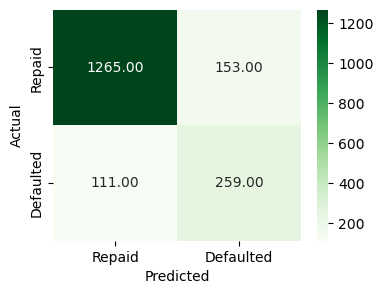

In [84]:
# create and fit decision tree model
# setting class weights of 0.2, 0.8 based on split in target classes (0.8, 0.2)
dtree_no = DecisionTreeClassifier(random_state = 101, class_weight={0: 0.2, 1: 0.8})
dtree_no.fit(X_train_no, y_train_no)

# predict on training data
dt_pred_no_tr = dtree_no.predict(X_train_no)

# predict on test data
dt_pred_no = dtree_no.predict(X_test_no)

# assess performance on training data
metrics_score(y_train_no, dt_pred_no_tr)

# assess performance on test data
metrics_score(y_test_no, dt_pred_no)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3353
           1       1.00      1.00      1.00       819

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



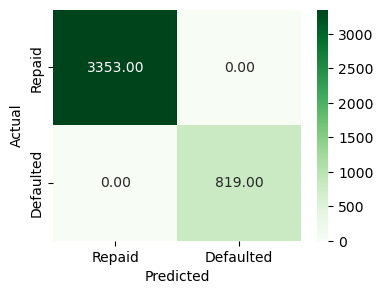

Accuracy: 0.844
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1418
           1       0.63      0.61      0.62       370

    accuracy                           0.84      1788
   macro avg       0.76      0.76      0.76      1788
weighted avg       0.84      0.84      0.84      1788



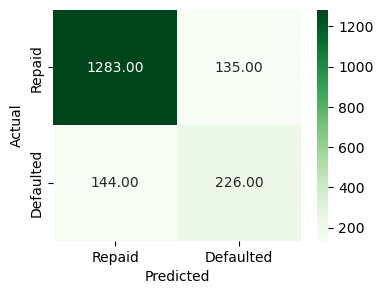

In [85]:
# How does a model perform with scaled data?
# setting class weights of 0.2, 0.8 based on split in target classes (0.8, 0.2)
dtree_sc = DecisionTreeClassifier(random_state = 101, class_weight={0: 0.2, 1: 0.8})
dtree_sc.fit(X_train_scaled, y_train)

# predict on training data
dt_pred_sc_tr = dtree_sc.predict(X_train_scaled)

# predict on test data
dt_pred_sc = dtree_sc.predict(X_test_scaled)

# assess performance on training data
metrics_score(y_train, dt_pred_sc_tr)

# assess performance on test data
metrics_score(y_test, dt_pred_sc)

**Observations:**
- Raw data (has missing values and outliers) performs slightly better than the cleaned data on all metrics
- Treating outliers (except DELINQ and DEROG) has minimal effect as far as improving the model
- Imputing missing data (and retaining outliers) results in a small drop in performance, as does using scaled data

### **Decision Tree Hyperparameter Tuning**

* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on the specific parameter values of a model.
* The parameters of the model used to apply these methods are **optimized by a cross-validated grid-search** over a parameter grid.

In [86]:
# new tree, defined weights by target distribution (inverse -> balance)
dt_tune = DecisionTreeClassifier(random_state = 101, class_weight = {0: 0.2, 1: 0.8})

# grid of parameters to choose from
params = {'max_depth': np.arange(5, 10), 
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [20, 30, 40],
          'class_weight': ["balanced", {0: 0.2, 1: 0.8}]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(dt_tune, params, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# select model with best combination of parameters
dt_tune = grid_obj.best_estimator_

# fit "best" model
dt_tune.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=6, min_samples_leaf=20, random_state=101)

Accuracy: 0.8663
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3353
           1       0.62      0.82      0.71       819

    accuracy                           0.87      4172
   macro avg       0.79      0.85      0.81      4172
weighted avg       0.89      0.87      0.87      4172



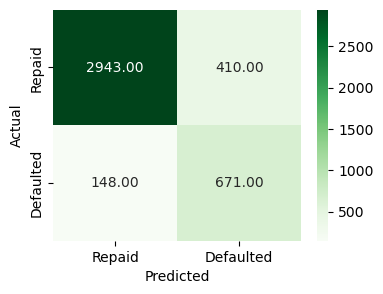

Accuracy: 0.8272
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1418
           1       0.56      0.78      0.65       370

    accuracy                           0.83      1788
   macro avg       0.75      0.81      0.77      1788
weighted avg       0.86      0.83      0.84      1788



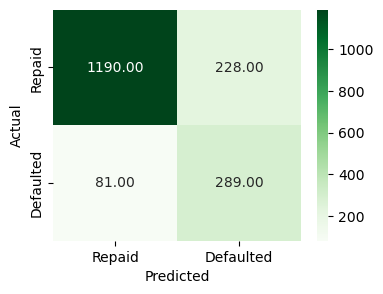

In [87]:
# assess performance on training data
dt_pred_tr_tune = dt_tune.predict(X_train)
metrics_score(y_train, dt_pred_tr_tune)

# assess performance on test data
dt_pred_tune = dt_tune.predict(X_test)
metrics_score(y_test, dt_pred_tune)

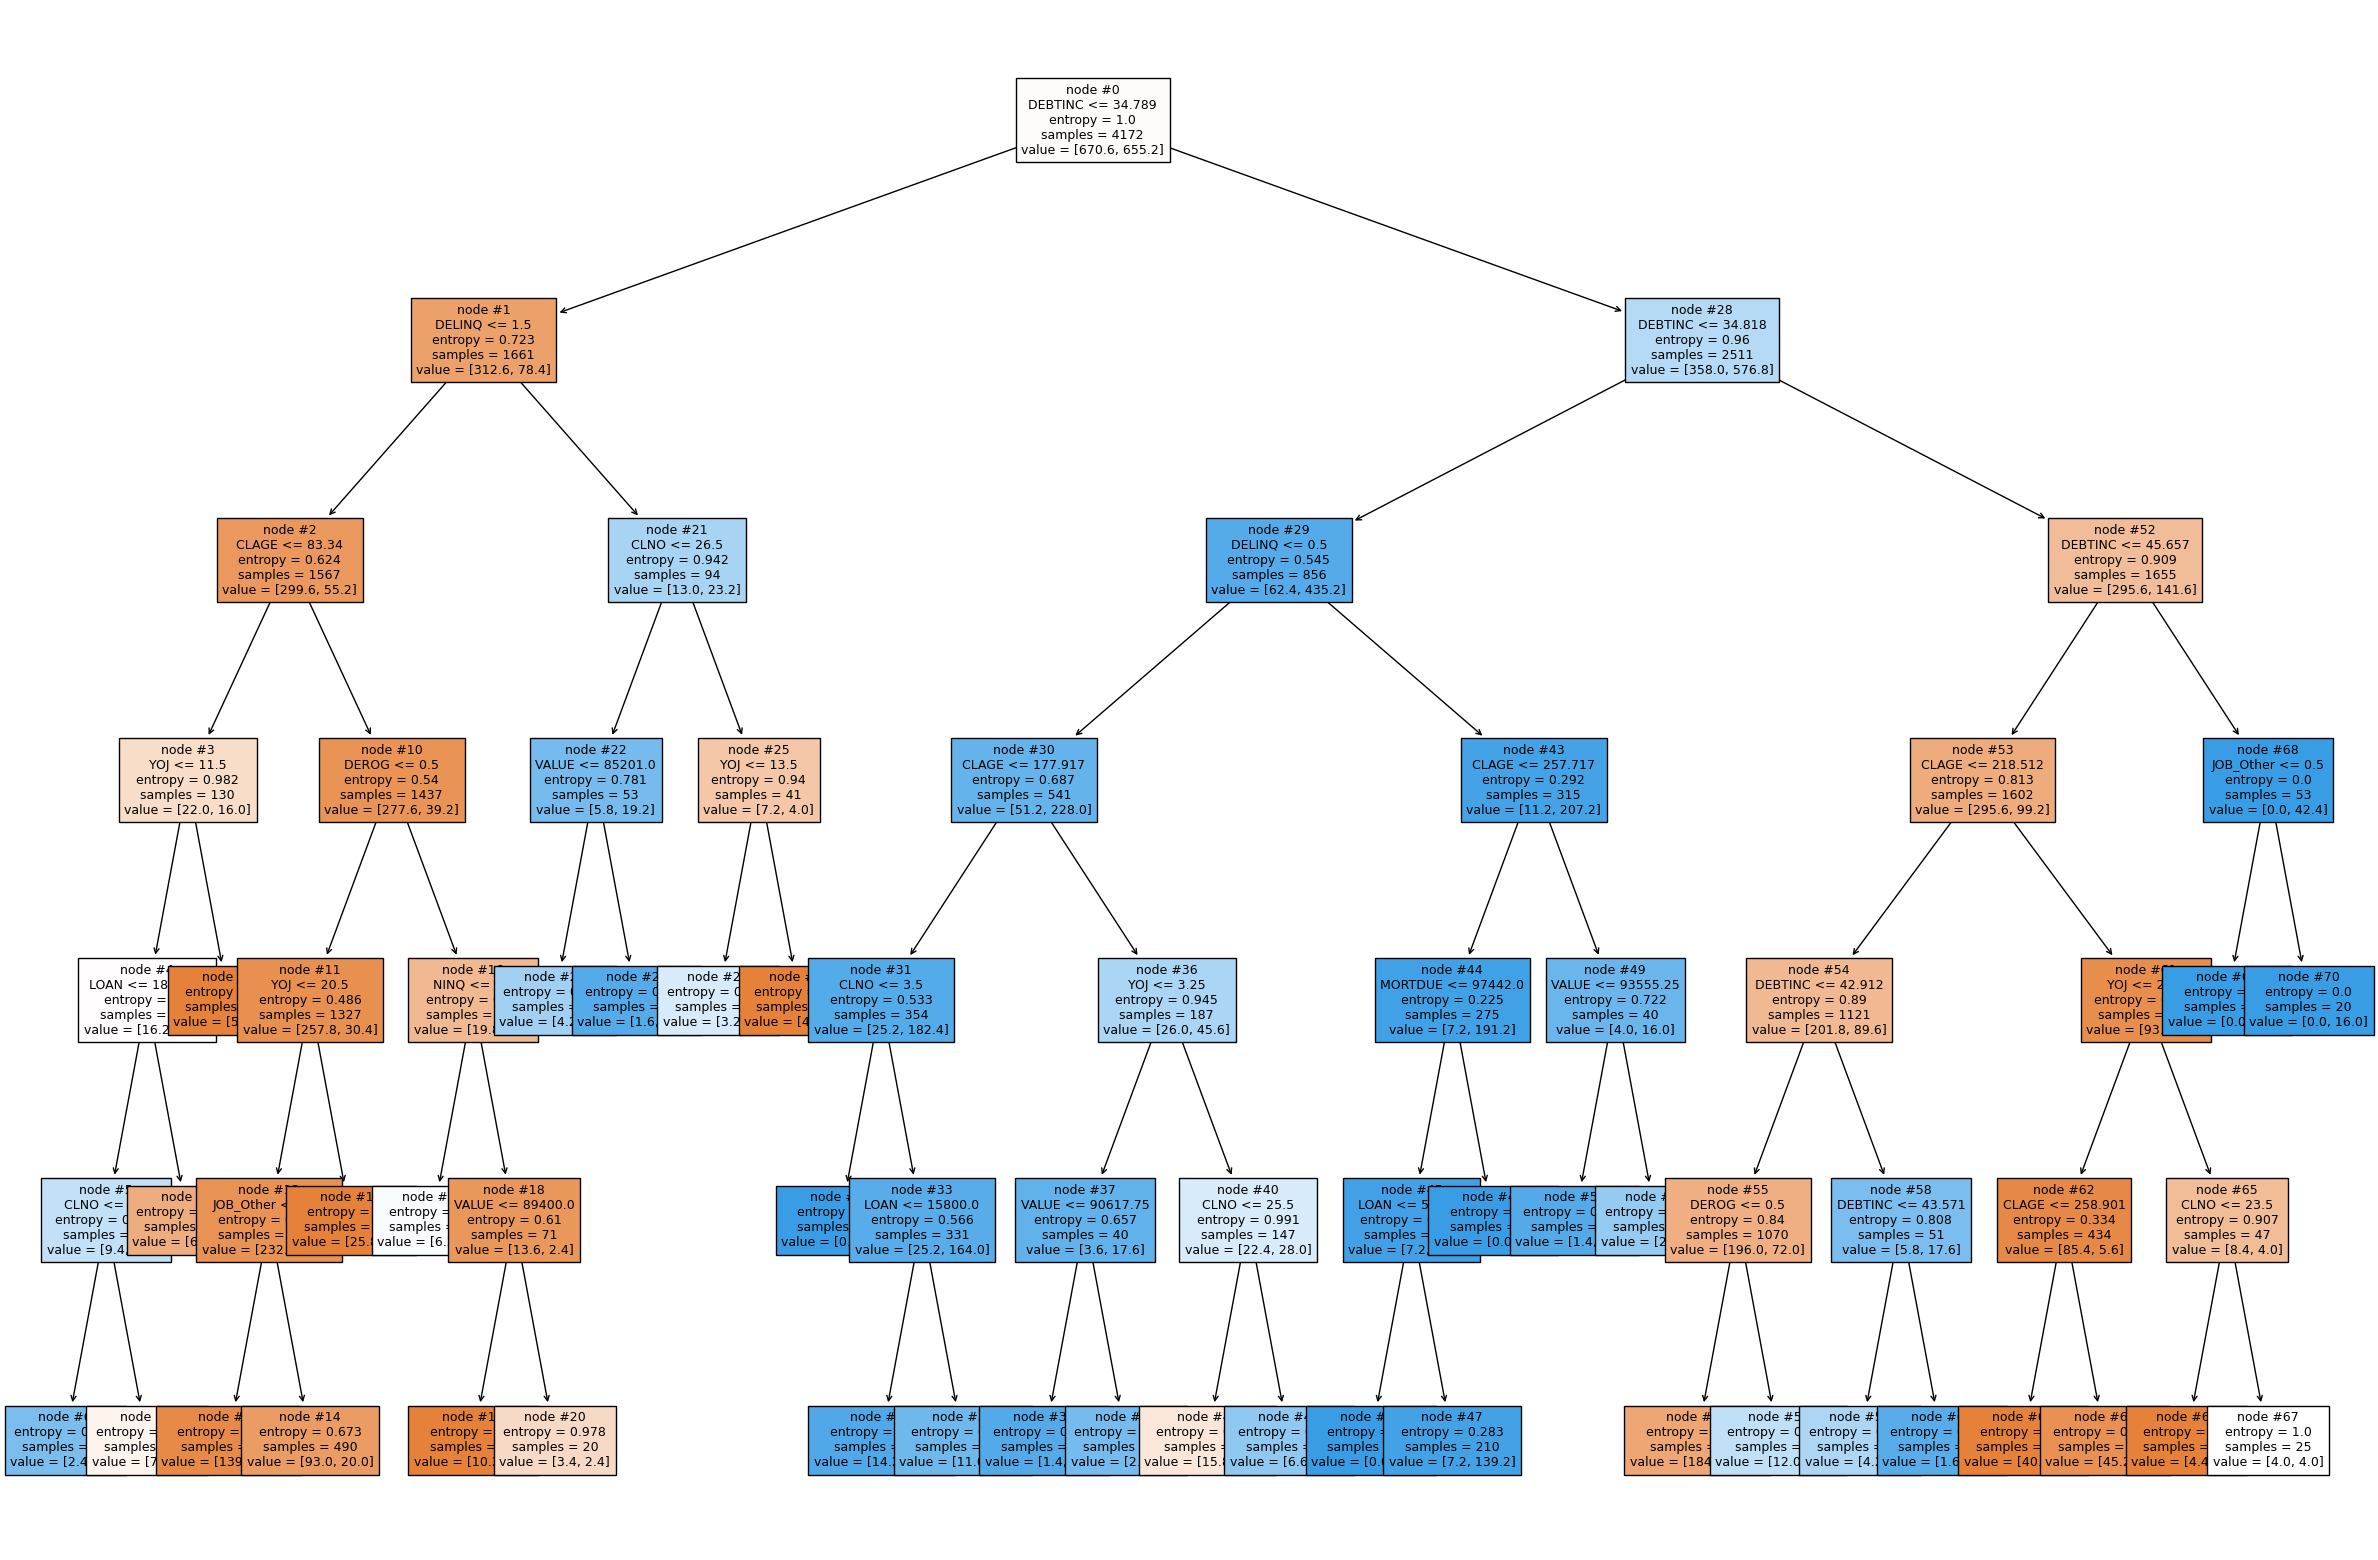

In [88]:
# Time to see what the tree actually looks like

plt.figure(figsize = (30, 20))
tree.plot_tree(dt_tune, feature_names=feature_names, filled=True, fontsize=9, node_ids=True)
plt.show()

**Observation:**
- Looks to be many nodes that could be removed and the same end result would be reached
- The model is no longer over-fitting to the training data, but that has not increased performance on the test data
- Model still has poor precision for loans defaulting

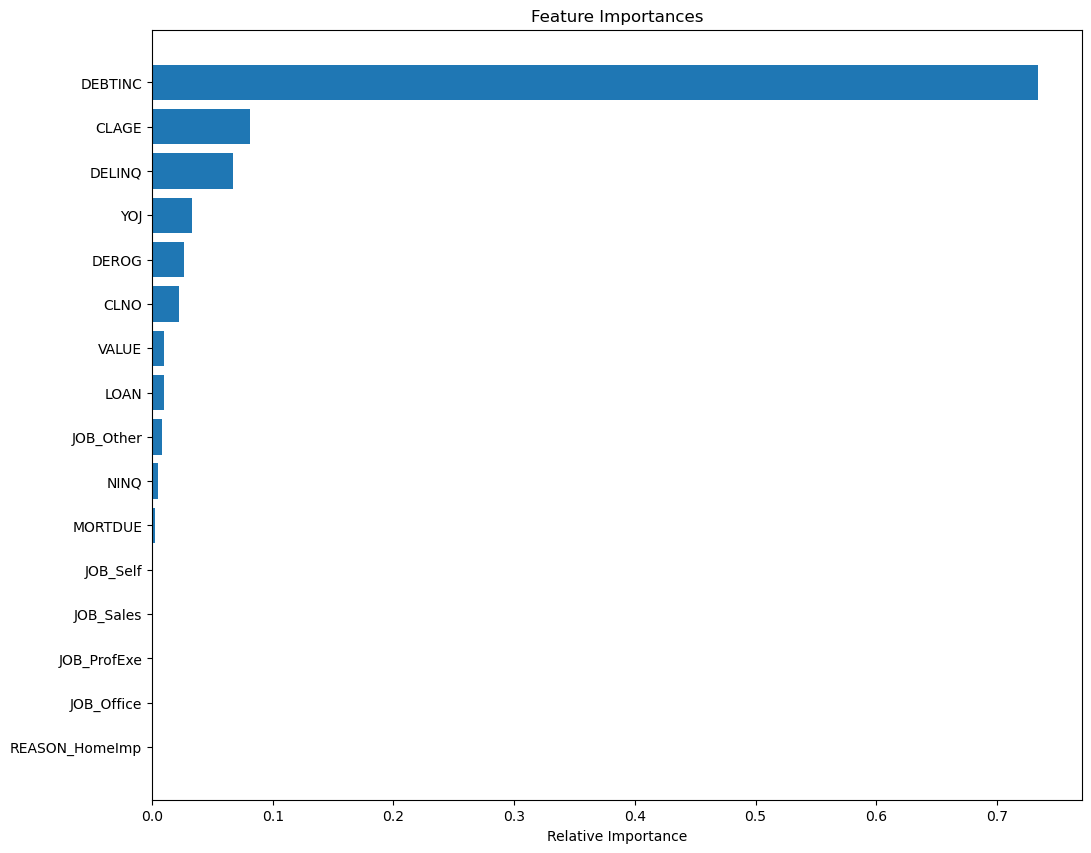

In [89]:
# How important are the features?
# get importance of each from model
imp_dtree = dt_tune.feature_importances_

indices = np.argsort(imp_dtree)

plt.figure(figsize = (12, 10))
plt.title('Feature Importances')

# plot bars
plt.barh(range(len(indices)), imp_dtree[indices], align = 'center')

# label bars
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **Random Forest Classifier**

Random Forest is a bagging algorithm where the base models are Decision Trees. Samples are taken from the training data and on each sample a decision tree makes a prediction. 

The results from all the decision trees are combined together and the final prediction is made using voting or averaging.

In [90]:
# Build Random Forest classifier - initial parameters should not be constraining models
# parameters are based on above results
rfc = RandomForestClassifier(n_estimators = 100, random_state=101, criterion='entropy', 
                        max_depth=9, min_samples_split=20, class_weight={0: 0.2, 1: 0.8})
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=9, min_samples_split=20, random_state=101)

Accuracy: 0.9286
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3353
           1       0.78      0.88      0.83       819

    accuracy                           0.93      4172
   macro avg       0.88      0.91      0.89      4172
weighted avg       0.93      0.93      0.93      4172



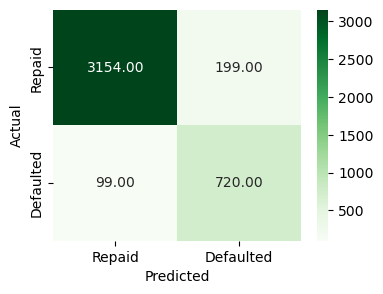

In [91]:
# assess performance on training data
pred_rfc_tr = rfc.predict(X_train)
metrics_score(y_train, pred_rfc_tr)

Accuracy: 0.8887
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1418
           1       0.70      0.81      0.75       370

    accuracy                           0.89      1788
   macro avg       0.82      0.86      0.84      1788
weighted avg       0.90      0.89      0.89      1788



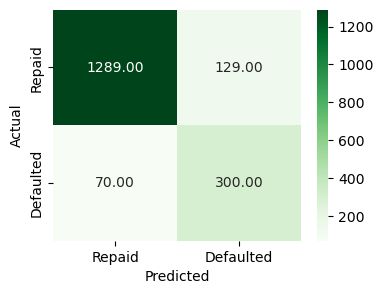

In [92]:
# assess performance on test data
pred_rfc = rfc.predict(X_test)
metrics_score(y_test, pred_rfc)

### **Random Forest Classifier Hyperparameter Tuning**

In [99]:
%%time
# Adjust hyperparameters of Random Forest Classifier
# create new rfc
rfc_tune = RandomForestClassifier(random_state = 101, criterion='entropy')

# Grid of parameters to choose from
rfc_params = {
    "max_depth": np.arange(7, 11),
    "max_features": [0.8, 0.9],
    "min_samples_split": [10, 20],
    "class_weight": ["balanced", {0: 0.2, 1: 0.8}]
}

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = make_scorer(f1_score, pos_label = 1)
#scorer = make_scorer(precision_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rfc_tune, rfc_params, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rfc_tune = grid_obj.best_estimator_

# Print out "best" model
rfc_tune

CPU times: total: 3min 27s
Wall time: 5min 52s


RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=10, max_features=0.8, min_samples_split=10,
                       random_state=101)

In [101]:
# save model
dump(rfc_tune, "rfc_tune.joblib")
# rfc_tune = load("rfc_tune.joblib")

Accuracy: 0.9415
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3353
           1       0.81      0.91      0.86       819

    accuracy                           0.94      4172
   macro avg       0.90      0.93      0.91      4172
weighted avg       0.95      0.94      0.94      4172



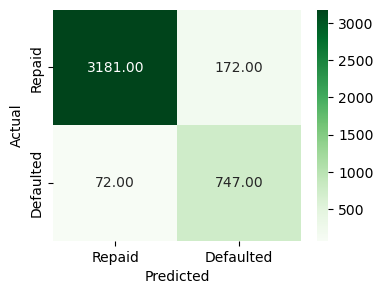

In [102]:
# assess performance on training data
pred_rfc_tune_tr = rfc_tune.predict(X_train)
metrics_score(y_train, pred_rfc_tune_tr)

Accuracy: 0.877
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1418
           1       0.68      0.76      0.72       370

    accuracy                           0.88      1788
   macro avg       0.81      0.83      0.82      1788
weighted avg       0.88      0.88      0.88      1788



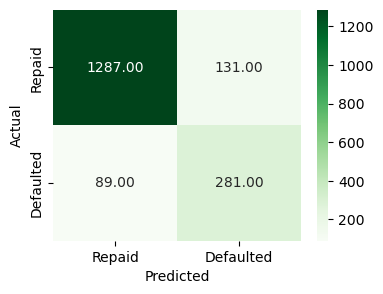

In [103]:
# assess performance on test data
pred_rfc_tune = rfc_tune.predict(X_test)
metrics_score(y_test, pred_rfc_tune)

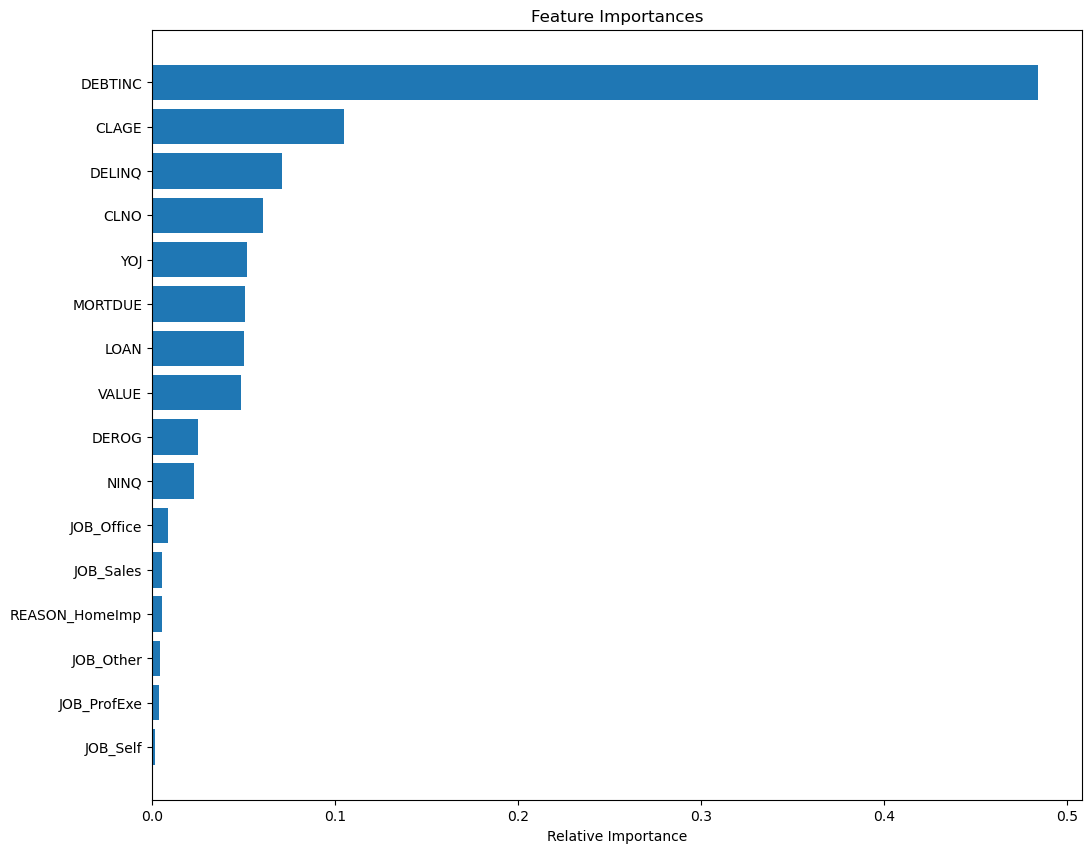

In [98]:
# get importance of each from model
imp_rfc = rfc_tune.feature_importances_

indices = np.argsort(imp_rfc)

plt.figure(figsize = (12, 10))
plt.title('Feature Importances')

# plot bars
plt.barh(range(len(indices)), imp_rfc[indices], align = 'center')

# label bars
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Support Vector Machine Classifier

In [104]:
# instantiate SVM model
s=SVC(random_state = 101, class_weight={0: 0.2, 1: 0.8})

# fit to data
s.fit(X_train, y_train)

# predict on training and test data
pred_svm_tr=s.predict(X_train)
pred_svm=s.predict(X_test)

Accuracy: 0.6493
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      3353
           1       0.26      0.42      0.32       819

    accuracy                           0.65      4172
   macro avg       0.54      0.56      0.54      4172
weighted avg       0.72      0.65      0.68      4172



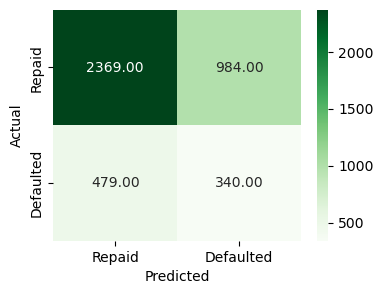

In [105]:
# assess performance on training data
metrics_score(y_train, pred_svm_tr)

Accuracy: 0.6314
              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1418
           1       0.26      0.41      0.31       370

    accuracy                           0.63      1788
   macro avg       0.54      0.55      0.53      1788
weighted avg       0.70      0.63      0.66      1788



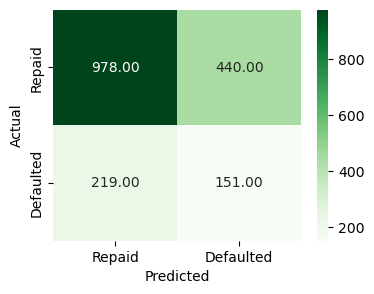

In [106]:
# assess performance on test data
metrics_score(y_test, pred_svm)

In [107]:
# Let's repeat, using scaled data to see if that improves model
# instantiate SVM model
s_sc=SVC(random_state = 101, class_weight={0: 0.2, 1: 0.8})

# fit to data
s_sc.fit(X_train_scaled, y_train)

# predict on training and test data
pred_svm_sc_tr=s_sc.predict(X_train_scaled)
pred_svm_sc=s_sc.predict(X_test_scaled)

Accuracy: 0.8221
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      3353
           1       0.53      0.80      0.64       819

    accuracy                           0.82      4172
   macro avg       0.74      0.81      0.76      4172
weighted avg       0.86      0.82      0.83      4172



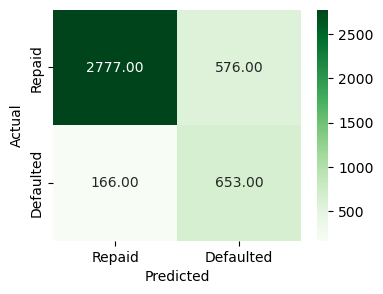

In [108]:
# assess performance on training data
metrics_score(y_train, pred_svm_sc_tr)

Accuracy: 0.8143
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1418
           1       0.54      0.76      0.63       370

    accuracy                           0.81      1788
   macro avg       0.73      0.79      0.75      1788
weighted avg       0.85      0.81      0.82      1788



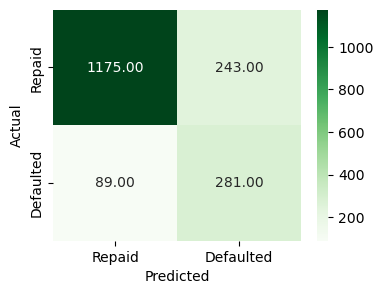

In [109]:
# assess performance on test data
metrics_score(y_test, pred_svm_sc)

### SVM Hyperparameter Tuning

In [110]:
%%time

# Now let's try to tune the SVM for better performance
# Suppress probability calc for speed
svm_tune = SVC(random_state = 101, probability=False) 

# Grid of parameters to choose from
svm_params = {"kernel": ['poly', 'rbf', 'linear', 'sigmoid'],
        "C": [1, 10, 50],
        "gamma": [1, 0.1, 0.01, 'scale'],
        "class_weight": [{0: 0.2, 1: 0.8}, 'balanced']
}

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(svm_tune, svm_params, scoring = scorer, cv = 5)
# Using a sub-set of data for faster runtime
grid_obj = grid_obj.fit(X_train_scaled.head(1000), y_train.head(1000))

# probability calc with best parameters
svm_tune = SVC(probability=True, **grid_obj.best_params_)

# display chosen parameters
grid_obj.best_params_

CPU times: total: 16.7 s
Wall time: 27 s


{'C': 50, 'class_weight': {0: 0.2, 1: 0.8}, 'gamma': 'scale', 'kernel': 'rbf'}

In [112]:
# fit to full dataset
svm_tune.fit(X_train_scaled, y_train)

SVC(C=50, class_weight={0: 0.2, 1: 0.8}, probability=True)

In [113]:
# save model
dump(svm_tune, "svm_tune.joblib")

['svm_tune.joblib']

Accuracy: 0.9501
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3353
           1       0.83      0.93      0.88       819

    accuracy                           0.95      4172
   macro avg       0.91      0.94      0.92      4172
weighted avg       0.95      0.95      0.95      4172



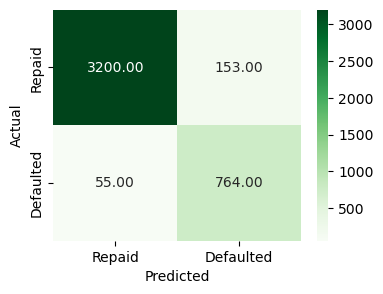

In [114]:
# predict and evaluate training data
pred_svm_tune_tr=svm_tune.predict(X_train_scaled)
metrics_score(y_train, pred_svm_tune_tr)

Accuracy: 0.8909
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1418
           1       0.72      0.76      0.74       370

    accuracy                           0.89      1788
   macro avg       0.83      0.84      0.84      1788
weighted avg       0.89      0.89      0.89      1788



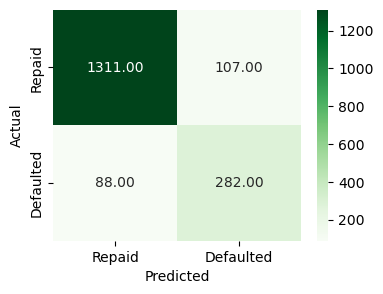

In [115]:
# predict and evaluate test data
pred_svm_tune=svm_tune.predict(X_test_scaled)
metrics_score(y_test, pred_svm_tune)

**Observations:**<br> 
SVC does yield a model with higher accuracy, recall and precision than decision tree or random forest. However it may be harder to interpret, thus harder to provide justification for denying a loan.

## eXtreme Gradient Boost Model

Accuracy: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3353
           1       1.00      1.00      1.00       819

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



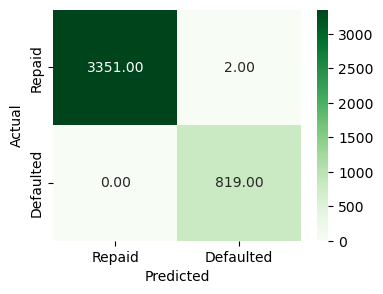

Accuracy: 0.9195
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1418
           1       0.81      0.80      0.80       370

    accuracy                           0.92      1788
   macro avg       0.88      0.87      0.88      1788
weighted avg       0.92      0.92      0.92      1788



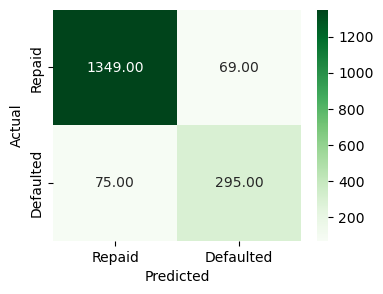

CPU times: total: 2.16 s
Wall time: 1.17 s


In [116]:
%%time

# instantiate model, weight = #neg/#pos
xgb = XGBClassifier(scale_pos_weight=4)

# define eval set for model to use
# using train and test data to plot metrics for both
# eval_set = [(X_test, y_test)]
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the model; 2 metrics for plotting
xgb.fit(X_train, y_train, eval_set=eval_set, eval_metric=["error", "logloss"], verbose=False)

# retrieve performance metrics
results = xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# predict on training data and evaluate
xgb_pred_train = xgb.predict(X_train)
metrics_score(y_train, xgb_pred_train)

# predict on test data and evaluate
xgb_pred = xgb.predict(X_test)
metrics_score(y_test, xgb_pred)

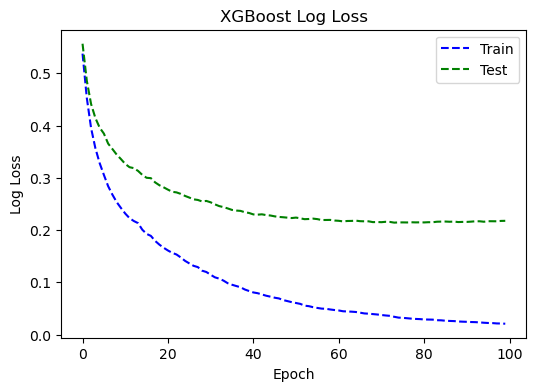

In [117]:
# plot log loss
plt.figure(figsize = (6, 4))
plt.plot(x_axis, results['validation_0']['logloss'], 'b--', label = 'Train')
plt.plot(x_axis, results['validation_1']['logloss'], 'g--', label = 'Test')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.legend(loc = 'upper right')
plt.show()

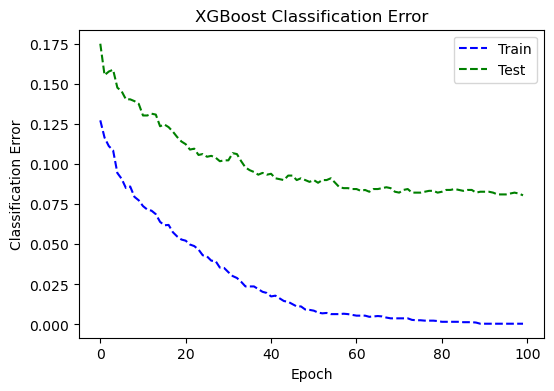

In [118]:
# plot classification error
plt.figure(figsize = (6, 4))
plt.plot(x_axis, results['validation_0']['error'], 'b--', label = 'Train')
plt.plot(x_axis, results['validation_1']['error'], 'g--', label = 'Test')
plt.xlabel('Epoch')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.legend(loc = 'upper right')
plt.show()

**Observations:**
- XGBoost is overfitting to the training data
- Error and logloss charts indicate that early stopping, around 40-60 epochs might help

### XGBoost Hyperparameter Tuning

In [180]:
%%time
# let's try to tune it to better fit test data
# only need to evaluate on test data here
eval_set = [(X_test, y_test)]
estimator = XGBClassifier(objective= 'binary:logistic', 
                  nthread=4, 
                  seed=101, 
                  eval_set=eval_set, 
                  verbose=False,   # suppress output
                  eval_metric='error', 
                  eta=0.2  # smaller step size
)

# parameters to adjust
xgb_params = {
    'max_depth': range (5, 8),
    'colsample_bynode': [0.6, 0.7, 0.8],
    #'colsample_bytree': [0.6, 0.7, 0.8],
    'subsample': [0.8, 0.7]
}

# apply parameters and model to grid search
grid_obj = GridSearchCV(estimator=estimator, param_grid=xgb_params, scoring = scorer, cv=5)

# Using "raw" unprocessed data, but results are almost identical to processed data
# fit to data and search
grid_obj = grid_obj.fit(X_train, y_train)

# pick best model
xgb_tune = grid_obj.best_estimator_

# print out parameters
grid_obj.best_params_

CPU times: total: 22.8 s
Wall time: 11.2 s


{'colsample_bynode': 0.6, 'max_depth': 7, 'subsample': 0.7}

Accuracy: 0.9981
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3353
           1       1.00      0.99      1.00       819

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



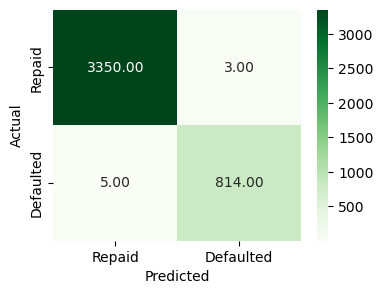

In [181]:
# predict on training data and evaluate
xgb_tune_pred_train = xgb_tune.predict(X_train)
metrics_score(y_train, xgb_tune_pred_train)

Accuracy: 0.9144
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1418
           1       0.85      0.71      0.77       370

    accuracy                           0.91      1788
   macro avg       0.89      0.84      0.86      1788
weighted avg       0.91      0.91      0.91      1788



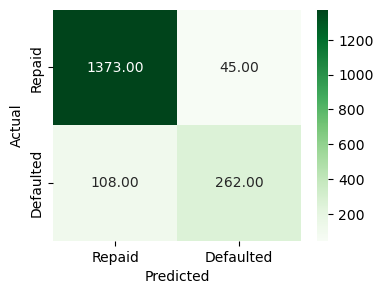

In [182]:
# predict on test data and evaluate
xgb_tune_pred = xgb_tune.predict(X_test)
metrics_score(y_test, xgb_tune_pred)

Accuracy: 0.9952
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3353
           1       0.98      1.00      0.99       819

    accuracy                           1.00      4172
   macro avg       0.99      1.00      0.99      4172
weighted avg       1.00      1.00      1.00      4172



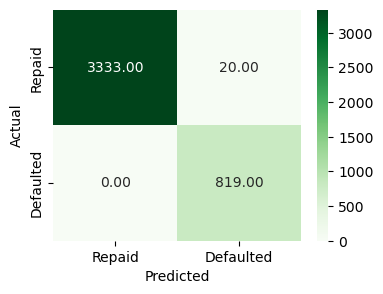

Accuracy: 0.9133
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1418
           1       0.78      0.82      0.80       370

    accuracy                           0.91      1788
   macro avg       0.86      0.88      0.87      1788
weighted avg       0.92      0.91      0.91      1788



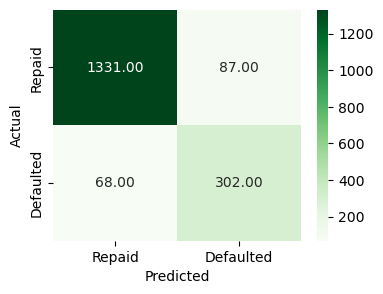

In [149]:
# Build model with optimized parameters and adding early stopping
# instantiate model
xgb2 = XGBClassifier(scale_pos_weight=4, 
            objective='binary:logistic', 
            n_estimators=100,  # 100 trees
            seed=101, 
            nthread=4, 
            eta=0.2,   # max learning step size
            colsample_bytree=0.6,  # portion of features available for each tree
            colsample_bylevel=0.7,  # portion of features available at each level
            max_depth=8, 
            subsample=0.78,  # sample using 80% of training data
            early_stopping_rounds=5  # stop after 5 epochs of no improvement in eval metric
)

# define eval set for model to use
eval_set = [(X_test, y_test)]

# Fit the model; 2 metrics for plotting
xgb2.fit(X_train, y_train, eval_metric="error@0.55", eval_set=eval_set, verbose=False)

# predict on training data and evaluate
xgb_pred2_train = xgb2.predict(X_train)
metrics_score(y_train, xgb_pred2_train)

# predict on test data and evaluate
xgb_pred2 = xgb2.predict(X_test)
metrics_score(y_test, xgb_pred2)

**Observations:** Although the metrics for these 2 models are similar, especially when looking at the overall values. However, the second model, using early stopping and a threshold of 0.55 is a bit more conservative. Accuracy is the same, but fewer false negatives.

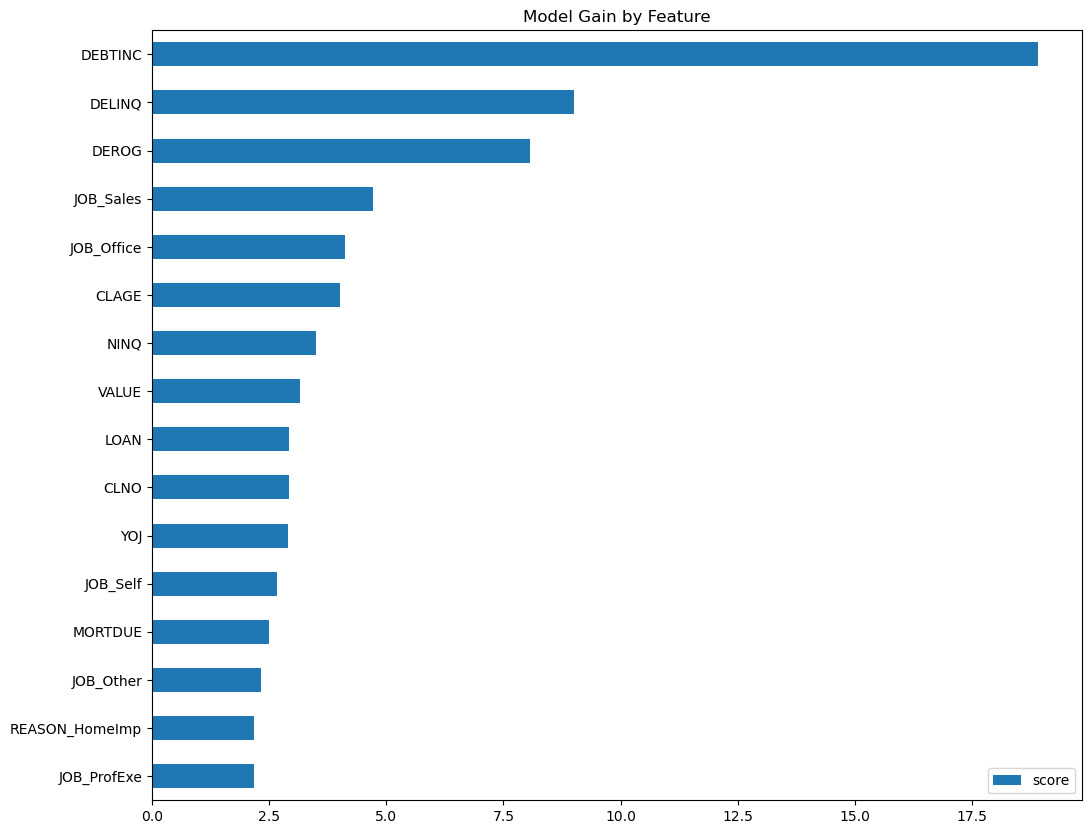

In [169]:
# get importance (as measured by gain) of each from model
feat_imp = xgb2.get_booster().get_score(importance_type='gain') # or weight or cover

# split out features and scores
keys = list(feat_imp.keys())
values = list(feat_imp.values())

# create df, ordered by score
data = pd.DataFrame(values, keys, ["score"]).sort_values(by="score", ascending=True)

# plot on horizontal bar chart
data.plot(kind='barh', figsize = (12,10)) 
plt.title('Model Gain by Feature')
plt.show()

In [151]:
# save model
dump(xgb2, "xgb_tune.joblib")

['xgb_tune.joblib']

In [152]:
# Let's see if we can get it to explain decisions using SHAP
import shap

# Create a tree explainer
xgb_explainer = shap.TreeExplainer(xgb2)
shap_explainer_values = xgb_explainer(X_test, xgb_pred2)

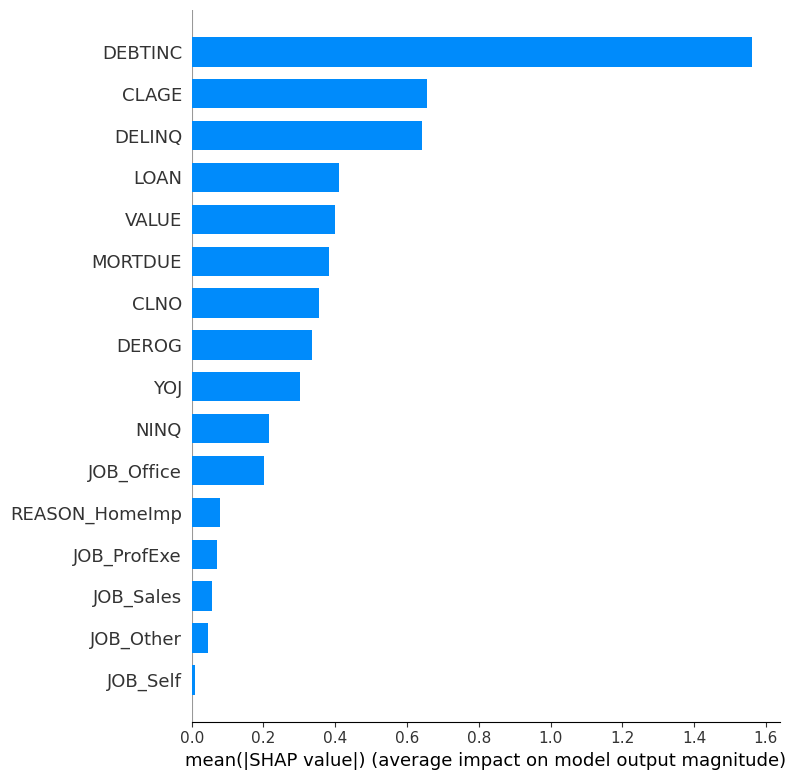

In [166]:
# use shap to get feature importance
shap_values = xgb_explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

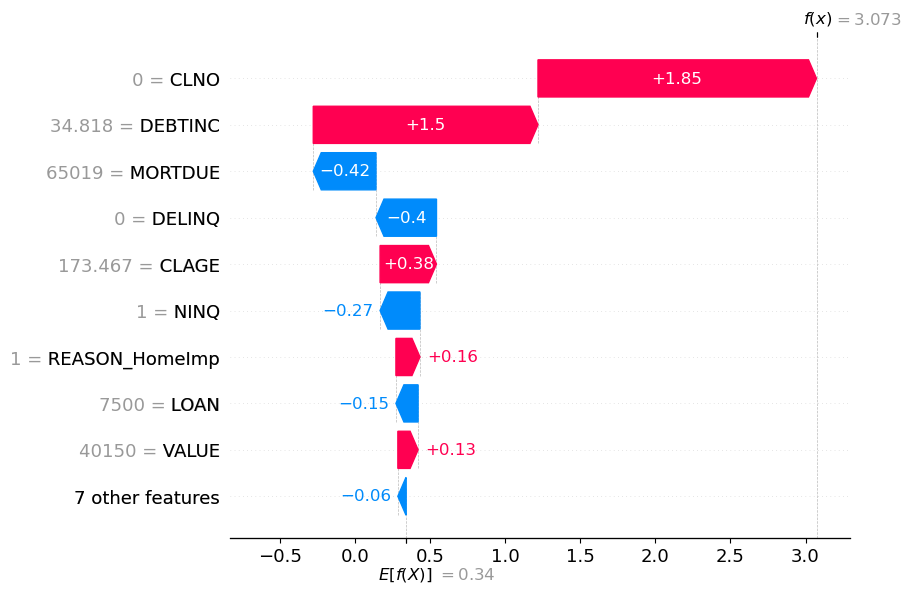

In [176]:
# Waterfall plot of 2nd value in test/pred data set
shap.waterfall_plot(shap_explainer_values[3])

**Observations:** While not definitive in terms of giving reason for why a loan is denied, it does a much better job of indicating what is likely to have lead to the denial.

## Light Gradient Boost Model

[LightGBM] [Info] Number of positive: 819, number of negative: 3353
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1408
[LightGBM] [Info] Number of data points in the train set: 4172, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196309 -> initscore=-1.409527
[LightGBM] [Info] Start training from score -1.409527
Accuracy: 0.9926
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3353
           1       1.00      0.97      0.98       819

    accuracy                           0.99      4172
   macro avg       0.99      0.98      0.99      4172
weighted avg       0.99      0.99      0.99      4172



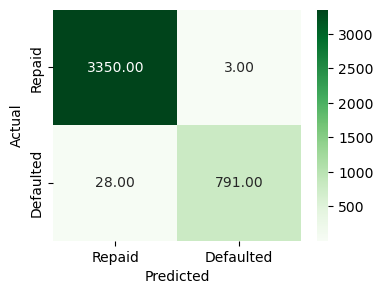

Accuracy: 0.9122
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1418
           1       0.84      0.71      0.77       370

    accuracy                           0.91      1788
   macro avg       0.88      0.84      0.86      1788
weighted avg       0.91      0.91      0.91      1788



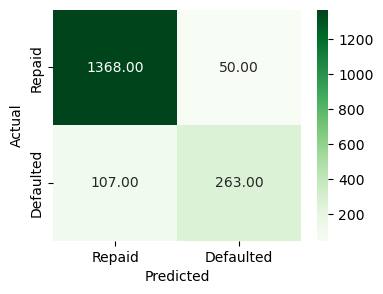

In [188]:
lgbm = lgb.LGBMClassifier(random_state=101)

lgbm.fit(X_train, y_train)

# predict on training data and evaluate
lgbm_pred_train = lgbm.predict(X_train)
metrics_score(y_train, lgbm_pred_train)

# predict on test data and evaluate
lgbm_pred = lgbm.predict(X_test)
metrics_score(y_test, lgbm_pred)

### LGBM Hyperparameter Tuning

In [200]:
%%time

# Create LGBM object
lgbm_tune = lgb.LGBMClassifier(random_state=42, verbosity=-1)

# Grid of parameters to choose from
lgbm_params = {
    "learning_rate": [0.05, 0.1, 0.2],
    #"n_estimators": [75, 100, 150],
    "max_depth": range(6, 9),
    "num_leaves": [20, 30, 40],
    "min_child_samples": [10, 20],
    "subsample": [0.5, 0.6, 0.8],
    "colsample_bytree": [0.7, 0.8, 0.9],
}

# apply parameters and model to grid search
grid_obj = GridSearchCV(lgbm_tune, param_grid=lgbm_params, scoring = "recall", cv=5)

# Using "raw" unprocessed data, but results are almost identical to processed data
# fit to data and search
grid_obj = grid_obj.fit(X_train, y_train)

# pick best model
lgbm_tune = grid_obj.best_estimator_

# print out parameters
grid_obj.best_params_

CPU times: total: 6min 6s
Wall time: 2min 56s


{'colsample_bytree': 0.9,
 'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_samples': 10,
 'num_leaves': 30,
 'subsample': 0.5}

Accuracy: 0.9993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3353
           1       1.00      1.00      1.00       819

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



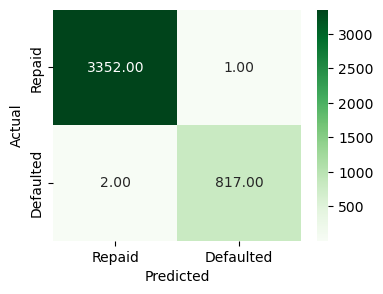

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1418
           1       0.86      0.74      0.79       370

    accuracy                           0.92      1788
   macro avg       0.90      0.85      0.87      1788
weighted avg       0.92      0.92      0.92      1788



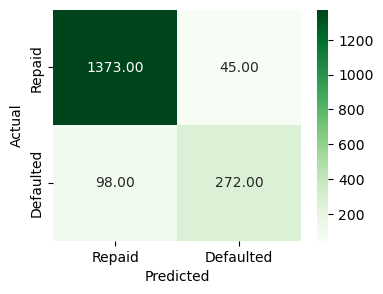

In [201]:
# predict on training data and evaluate
lgbm_tune_train = lgbm_tune.predict(X_train)
metrics_score(y_train, lgbm_tune_train)

# predict on test data and evaluate
lgbm_tune_pred = lgbm_tune.predict(X_test)
metrics_score(y_test, lgbm_tune_pred)

In [205]:
# save model
dump(lgbm_tune, "lgbm_tune.joblib")

['lgbm_tune.joblib']

### Model Comparison
**How do each of the tuned models perform?**

In [125]:
# Train classifiers one by one
def metrics_table(model_name, y_train_predict, y_test_predict, y_train=y_train, y_test=y_test):
    """
    Takes in actual and predicted y values
    Calculates performance metrics for each
    Combines data into one table for comparison
    
    model_name: string, name to display for model
    """
    train_acc.append(accuracy_score(y_true=y_train, y_pred=y_train_predict))
    test_acc.append(accuracy_score(y_true=y_test, y_pred=y_test_predict))

    train_prc.append(precision_score(y_true=y_train, y_pred=y_train_predict))
    test_prc.append(precision_score(y_true=y_test, y_pred=y_test_predict))

    train_recall.append(recall_score(y_true=y_train, y_pred=y_train_predict))
    test_recall.append(recall_score(y_true=y_test, y_pred=y_test_predict))

    train_f1.append(f1_score(y_true=y_train, y_pred=y_train_predict))
    test_f1.append(f1_score(y_true=y_test, y_pred=y_test_predict))
    
    model_names.append(model_name)

In [202]:
# define lists for each metric
train_acc, test_acc, train_prc, test_prc, train_recall, test_recall, train_f1, test_f1 = [], [], [], [], [], [], [], []

# list to collect model names
model_names = []

metrics_table('Logistic', lr_tune_opt_pred_tr, lr_tune_opt_pred)
metrics_table('D Tree', dt_pred_tr_tune, dt_pred_tune)
metrics_table('Random Forest', pred_rfc_tune_tr, pred_rfc_tune)
metrics_table('SVC', pred_svm_tune_tr, pred_svm_tune)
metrics_table('XGBoost', xgb_pred2_train, xgb_pred2)
metrics_table('LightGBM', lgbm_tune_train, lgbm_tune_pred)

In [203]:
# Aggregating information and displaying the results as a dataframe
train_results = [train_acc, test_acc, train_prc, test_prc, 
                 train_recall, test_recall, train_f1, test_f1]

metrics = ['Accuracy (Train)', 'Accuracy (Test)', 'Precision (Train)', 'Precision (Test)', 
           'Recall (Train)', 'Recall (Test)', 'F1_Score (Train)', 'F1_Score (Test)']

metrics_df = pd.DataFrame(data=train_results, columns=model_names, index=metrics)
metrics_df.T

Accuracy (Train)  Accuracy (Test)  Precision (Train)  \
Logistic               0.815197         0.808166           0.528846   
D Tree                 0.866251         0.827181           0.620722   
Random Forest          0.941515         0.876957           0.812840   
SVC                    0.950144         0.890940           0.833152   
XGBoost                0.995206         0.913311           0.976162   
LightGBM               0.999281         0.920022           0.998778   

               Precision (Test)  Recall (Train)  Recall (Test)  \
Logistic               0.534884        0.537241       0.559459   
D Tree                 0.558994        0.819292       0.781081   
Random Forest          0.682039        0.912088       0.759459   
SVC                    0.724936        0.932845       0.762162   
XGBoost                0.776350        1.000000       0.816216   
LightGBM               0.858044        0.997558       0.735135   

               F1_Score (Train)  F1_Score (Test)  
Logistic               0.533010         0.546896  
D Tree                 0.706316         0.651635  
Random Forest          0.859609         0.718670  
SVC                    0.880184         0.743083  
XGBoost                0.987937         0.795784  
LightGBM               0.998167         0.791849

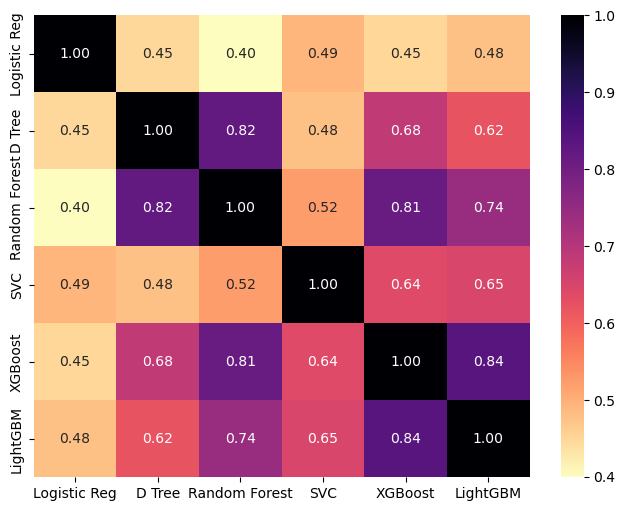

In [204]:
# gathering best predictions from each model type
all_preds = pd.DataFrame(
    data=[lr_tune_opt_pred, dt_pred_tune, pred_rfc_tune, pred_svm_tune, xgb_pred2, lgbm_tune_pred],
    index=['Logistic Reg', 'D Tree', 'Random Forest', 'SVC', 'XGBoost', 'LightGBM'])

#correlation and heatmap of predictions
plt.figure(figsize = (8, 6))
sns.heatmap(all_preds.T.corr(), annot = True, fmt = '.2f', cmap='magma_r')
plt.show()

**Comparison of various techniques and their relative performance:** 
- Logistic regression is not well suited for this task. Both precision and recall are poor and accuracy would be about the same as guesswork
- Logistic regression has poor correlation with predictions from the other models
- Decision tree model takes a big step up from logistic regression for recall, but otherwise not much better
- Random forest model performs fairly well, particularly in precision
- SVC requires scaled data to perform well and can be computationally very expensive to tune a model if predictions is not turned off. It does perform a little better than the Random Forest model, but has the disadvantage of being difficult to interpret it's decisions (it's a black box)
- Like Logistic regression, SVC also does not have very good correlation with the other models
- XGBoost performs well on all metrics, although it is challenging to avoid overfitting with it
- LightGB performs well, similar to XGBoost. Precision is better with LightGB but recall is better with XGBoost
- Random Forest, LightGB and XGBoost all have good correlation with eachother, suggesting the underlying decision making has similarities. This is not suprising since all are tree-based methods
- XGBoost, with the use of Shapely, gives good insight into the weighting of each feature for a given data point. It can't give a single, exact reason for a loan being denied, but would instead give the key reasons.
- From this data, it is **recommended that the XGBoost model be adopted**
- For further refinement, other ways of imputing missing data or handling outliers could be considered